In [1]:
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp

np.seterr(all="ignore")

from threeML import *
from threeML.io.package_data import get_path_of_data_file
from threeML.io import update_logging_level
from threeML.utils.data_download.Fermi_LAT.download_LAT_data import LAT_dataset
from astropy.io import fits as pyfits

SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


# This if you want to toggle different type of logging level.
update_logging_level("INFO")
log.error("error")
log.info("info")
log.debug("debug")

10:14:38 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=407348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=977775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=821507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=362429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=487928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=596210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

10:14:41 ERROR     error                                                                           ]8;id=456752;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_55615/3699701126.py\3699701126.py]8;;\:]8;id=503999;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_55615/3699701126.py#29\29]8;;\

         INFO      info                                                                            ]8;id=761998;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_55615/3699701126.py\3699701126.py]8;;\:]8;id=435128;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_55615/3699701126.py#30\30]8;;\

## GtBurst
Gtburst contains all the classes and methods to perform Fermi LAT data. It internally uses the official fermitools software. Here an example to list the IRFS available:


In [2]:
from GtBurst import IRFS

irfs = IRFS.IRFS.keys()
print(irfs)

odict_keys(['p7rep_transient', 'p7rep_source', 'p7rep_clean', 'p7rep_ultraclean', 'p8r2_transient100e', 'p8r2_transient100', 'p8r2_transient020e', 'p8r2_transient020', 'p8r2_transient010e', 'p8r2_transient010', 'p8r2_source', 'p8r2_clean', 'p8r2_ultraclean', 'p8r2_ultracleanveto', 'p8r2_transient100s', 'p8r2_transient015s', 'p8_transient100e', 'p8_transient100', 'p8_transient020e', 'p8_transient020', 'p8_transient010e', 'p8_transient010', 'p8_source', 'p8_clean', 'p8_ultraclean', 'p8_ultracleanveto', 'p8_sourceveto', 'p8_transient100s', 'p8_transient015s'])


## The LAT Transient Builder
Let's see how to make a plug in for the unbinned analysis of Fermi LAT data. First we use the information form a triggered GRB to obtain MET, RA and DEC, that are needed for the analysis.


In [3]:
from GtBurst.TriggerSelector import TriggerSelector

myFavoriteGRB = "bn190114873"


def findGRB(grb_name):
    a = TriggerSelector()
    a.downloadList()
    myGRB = {}
    for x in a.data:
        if x[0] == myFavoriteGRB:
            myGRB["MET"] = float(x[1])
            myGRB["RA"] = float(x[3])
            myGRB["DEC"] = float(x[4])
            myGRB["ERR"] = float(x[5])
            return myGRB
            pass
    return None

In [4]:
myGRB = findGRB(myFavoriteGRB)
print(myGRB)

{'MET': 569192227.626, 'RA': 54.51, 'DEC': -26.939, 'ERR': 0.05}


Then, we download LAT data and we build the transient builder, we want to analyze 1000 seconds since the trigger. Let's start download the data:


In [5]:
tstart = 0
tstop = 1000

In [6]:
myLATdataset = LAT_dataset()

myLATdataset.make_LAT_dataset(
    ra=myGRB["RA"],
    dec=myGRB["DEC"],
    radius=12,
    trigger_time=myGRB["MET"],
    tstart=tstart,
    tstop=tstop,
    data_type="Extended",
    destination_directory=".",
    Emin=100.0,
    Emax=10000.0,
)  # Energies are MeV (this is from 100 MeV to 10 GeV)

10:14:52 INFO      Query parameters:                                                       ]8;id=219798;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=935255;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#262\262]8;;\

         INFO                          coordfield = 54.5100,-26.9390                       ]8;id=174114;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=285895;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         coordsystem = J2000                                  ]8;id=694478;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=419093;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                          shapefield = 12                                     ]8;id=963695;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=310974;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                           timefield = 569192227.626,569193227.626            ]8;id=575206;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=748259;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                            timetype = MET                                    ]8;id=614889;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=782456;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         energyfield = 100.000,10000.000                      ]8;id=626354;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=237101;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO              photonOrExtendedOrNone = Extended                               ]8;id=636711;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=934106;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         destination = query                                  ]8;id=376800;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=381054;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                          spacecraft = checked                                ]8;id=22539;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=461645;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO      Query ID: 86ad4d2b3b3e5065f0f0a976e6fc8315                              ]8;id=844209;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=98833;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#271\271]8;;\

10:14:53 INFO      Estimated complete time for your query: 15 seconds                      ]8;id=67164;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=92440;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#427\427]8;;\

         INFO      If this download fails, you can find your data at                       ]8;id=128114;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=338072;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#436\436]8;;\
                  https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/QueryResults.cgi?id=L2209280                         
                  61454D896CEF286 (when ready)                                                                     

10:15:00 INFO      Downloading FT1 and FT2 files...                                        ]8;id=78945;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=213827;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#526\526]8;;\

10:15:04 WARNING   Only one FT1 file provided. Skipping the merge...                        ]8;id=913122;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=643329;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#98\98]8;;\

Writing ./bn190114873/gll_cspec_tr_bn190114873_v00.rsp...
time -p gtselect infile=./bn190114873/gll_ft1_tr_bn190114873_v00.fit outfile=__temp_ft1.fits ra=54.51 dec=-26.939 rad=15.0 tmin=569192226.626 tmax=569193228.626 emin=10.0 emax=300000.0 zmin=0.0 zmax=110.0 evclass="INDEF" evtype="INDEF" convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 0.12
user 0.08
sys 0.03
Writing ./bn190114873/gll_cspec_tr_bn190114873_v00.pha...
 *  Get energy binning from the response matrix...

    done.

 *  Run gtbindef and gtbin and bin in energy and time...

time -p gtbindef bintype="E" binfile=__ebins.txt outfile=__energyBins.fits energyunits="keV" chatter=2 clobber=yes debug=no gui=no mode="ql"


This is gtbindef version HEAD
real 0.25
user 0.01
sys 0.01
time -p gtbin evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/__temp_ft1.fits scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit outfile=__gtllebin__pha2.pha algorithm="PHA2" ebinalg="FILE" emin=30.0 emax=200000.0 ebinfile=__energyBins.fits tbinalg="LIN" tstart=569192227.626 tstop=569193227.626 dtime=4.096 tbinfile=NONE coordsys="CEL" axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=1 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD


real 2.78
user 2.34
sys 0.39

    done.

 *  Transform gtbin output in CSPEC format...

    done.

 *  Updating keywords in the headers of the CSPEC file...

    done.

gtllebin done!


We want perform a time resolved analysis. So, first we look at the data. We can play with the ROI selection and the cut.


In [7]:
roi = 10
zmax = 110.0
thetamax = 180.0
irfs = "p8_transient020e"
strategy = "time"
myLATdataset.extract_events(roi, zmax, irfs, thetamax, strategy="time")

time -p gtmktime scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" filter="(DATA_QUAL>0 || DATA_QUAL==-1) && LAT_CONFIG==1 && IN_SAA!=T && LIVETIME>0 && (ANGSEP(RA_ZENITH,DEC_ZENITH,54.51,-26.939)<=(110.0-10))" roicut=no evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit evtable="EVENTS" outfile="gll_ft1_tr_bn190114873_v00_mkt.fit" apply_filter=yes overwrite=no header_obstimes=yes tstart=569192227.626 tstop=569193227.626 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 0.09
user 0.05
sys 0.03

Using 305 data

time -p gtselect infile=gll_ft1_tr_bn190114873_v00_mkt.fit outfile=gll_ft1_tr_bn190114873_v00_filt.fit ra=54.51 dec=-26.939 rad=10.0 tmin=569192227.626 tmax=569193227.626 emin=100.0 emax=10000.0 zmin=0.0 zmax=110.0 evclass=8 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=

Done.
real 0.12
user 0.08
sys 0.03

Selected 251 events.


10:15:07 INFO      Extracted 251 events                                                    ]8;id=659755;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=411465;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#669\669]8;;\

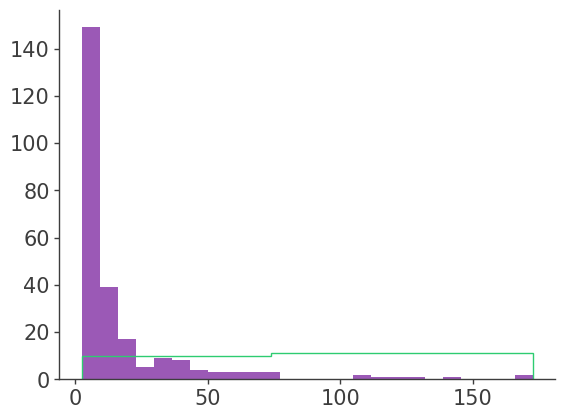

In [8]:
%matplotlib inline
event_file = pyfits.open(myLATdataset.filt_file)
event_times = sorted(event_file["EVENTS"].data["TIME"] - myGRB["MET"])
intervals = event_times[0::10]
_ = plt.hist(event_times)
_ = plt.hist(event_times, intervals, histtype="step")
# plt.show()

tstarts and tstops are defined as strings, with somma separated values for the starts and the ends of the time bins: For example tsrats="0,1,10" and tstops="1,10,20". To convert arrays in string we use these few lines of code:


In [9]:
tstarts = tstops = ""
for t0, t1 in zip(intervals[:-1], intervals[1:]):
    tstarts += "%.4f," % t0
    tstops += "%.4f," % t1
    pass
tstarts = tstarts[:-1].replace("-", "\\-")
tstops = tstops[:-1].replace("-", "\\-")

We can now make an instance the LAT transient builder


In [10]:
analysis_builder = TransientLATDataBuilder(
    myLATdataset.grb_name,
    outfile=myLATdataset.grb_name,
    roi=roi,
    tstarts=tstarts,
    tstops=tstops,
    irf=irfs,
    zmax=zmax,
    galactic_model="template",
    particle_model="isotr template",
    datarepository=".",
)
df = analysis_builder.display(get=True)

outfile                                                       190114873
roi                                                                  10
tstarts               2.6996,3.6358,3.9968,4.4024,4.7375,5.0909,5.54...
tstops                3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.98...
zmax                                                              110.0
emin                                                              100.0
emax                                                           100000.0
irf                                                    p8_transient020e
galactic_model                                                 template
particle_model                                           isotr template
source_model                                                  PowerLaw2
tsmin                                                              20.0
strategy                                                           time
thetamax                                                        

In [11]:
tstops

'3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.9896,6.3998,6.6889,7.0117,7.2936,7.7731,8.2167,8.8763,9.6573,10.5680,12.0568,14.6165,17.7834,21.4962,30.0798,40.8747,48.7118,73.7262,172.5754'

The run method will run (using gtburst) all the fermitools needed to obtain the needed file for the likelihood analysis (livetimecubes, exposure maps. It will also perfom a simple likelihood analysis with the standard likelihood of the fermitools (pylikelihood). The dataproducts created here will be used by threeML to make the fit.


In [12]:
LAT_observations = analysis_builder.run(include_previous_intervals=True)

Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/scripts/doTimeResolvedLike.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtdiffrsp_mp.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtexpmap_mp.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtltcube_mp.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gttsmap_mp.py


10:15:08 INFO      About to run the following command:                                 ]8;id=391793;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=651394;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#636\636]8;;\
                  /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermi                             
                  tools/GtBurst/scripts/doTimeResolvedLike.py 190114873 --outfile                                  
                  '190114873' --roi 10.000000 --tstarts                                                            
                  '2.6996,3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.9896,6.3998,6.68                             
                  89,7.0117,7.2936,7.7731,8.2167,8.8763,9.6573,10.5680,12.0568,14.6165                             
                  ,17.7834,21.4962,30.0798,40.8747,48.7118,73.7262' --tstops                                       
                  '3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.9896,6.3998,6.6889,7.01                             
                  17,7.2936,7.7731,8.2167,8.8763,9.6573,10.5680,12.0568,14.6165,17.783                             
                  4,21.4962,30.0798,40.8747,48.7118,73.7262,172.5754' --zmax                                       
                  110.000000 --emin 100.000000 --emax 100000.000000 --irf                                          
                  'p8_transient020e' --galactic_model 'template' --particle_model                                  
                  'isotr template' --source_model 'PowerLaw2' --tsmin 20.000000                                    
                  --strategy 'time' --thetamax 180.000000 --spectralfiles 'no'                                     
                  --liketype 'unbinned' --optimizeposition 'no' --datarepository '.'                               
                  --ltcube '' --expomap '' --ulphindex -2.000000 --flemin 100.000000                               
                  --flemax 10000.000000 --fgl_mode 'fast'                                                          

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   25.19240     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .29E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/MPLPlot.py:54: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/MPLPlot.py:65: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   13.71579     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .58E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA


Requested intervals:
------------------------------------------------------
2.6996               - 3.6358
3.6358               - 3.9968
3.9968               - 4.4024
4.4024               - 4.7375
4.7375               - 5.0909
5.0909               - 5.5471
5.5471               - 5.9896
5.9896               - 6.3998
6.3998               - 6.6889
6.6889               - 7.0117
7.0117               - 7.2936
7.2936               - 7.7731
7.7731               - 8.2167
8.2167               - 8.8763
8.8763               - 9.6573
9.6573               - 10.568
10.568               - 12.0568
12.0568              - 14.6165
14.6165              - 17.7834
17.7834              - 21.4962
21.4962              - 30.0798
30.0798              - 40.8747
40.8747              - 48.7118
48.7118              - 73.7262
73.7262              - 172.5754

Data files:
-----------
eventfile            /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit
ft2file      

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   4.786573     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .14E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   5.901543     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .70E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval3.6358-3.9968/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" srcmdl=190114873_LAT_xmlmodel_3.6358-3.9968.xml irfs="P8R3_TRANSIENT020E_V3" evclsmin="INDEF" evclass="INDEF" evtype="INDEF" convert=no chatter=2 clobber=yes debug=no gui=no mode="ql"
adding source 4FGL J0322.6-3712e
adding source GalacticTemplate
adding source IsotropicTemplate
Working on...
/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval3.6358-3.9968/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 8.22
user 7.47
sys 0.72
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/threeML

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   13.43105     FROM MIGRAD    STATUS=CONVERGED     67 CALLS       68 TOTAL
                     EDM=   .19E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   11.37565     FROM MIGRAD    STATUS=CONVERGED     74 CALLS       75 TOTAL
                     EDM=   .16E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  9.4%

  EXT PARAMETER                            

This is gtbin version HEAD
real 0.17
user 0.13
sys 0.02

Total number of events in the counts map: 10
Total time in Good Time Intervals:        0.3350999355316162
-> gtbuildxmlmodel xmlmodel='190114873_LAT_xmlmodel_4.4024-4.7375.xml' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' galactic_model='template' particle_model='isotr template' ra='54.51' dec='-26.939' fgl_mode='fast' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' source_model='PowerLaw2'

Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 

addFGLsources( 54.51 -26.939 18.0 190114873_LAT_xmlmodel_4.4024-4.7375.xml 0.3350999355316162 )
('SpatialMap', Tru

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   7.632503     FROM MIGRAD    STATUS=CONVERGED     61 CALLS       62 TOTAL
                     EDM=   .99E-06  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  5.3%

  EXT PARAMETER                            

time -p gtsrcprob evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval4.7375-5.0909/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" outfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval4.7375-5.0909/gll_ft1_tr_bn190114873_v00_filt_prob.fit srcmdl=gll_ft1_tr_bn190114873_v00_filt_likeRes.xml irfs="CALDB" evtype="INDEF" srclist= chatter=2 clobber=yes debug=no gui=no mode="ql"
real 6.90
user 6.15
sys 0.70


Interval # 6 (5.0909-5.5471):
-----------------------

-> gtdocountsmap.py rad='10.0' eventfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit' zmax='110.0' thetamax='180.0' emin='100.0' emax='100000.0' skymap='190114873_LAT_skymap_5.0909-5.5471.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn19011

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   10.79486     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .15E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   6.844639     FROM MIGRAD    STATUS=CONVERGED     66 CALLS       67 TOTAL
                     EDM=   .31E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

adding source 4FGL J0322.6-3712e
adding source GalacticTemplate
adding source IsotropicTemplate
Working on...
/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval5.5471-5.9896/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 8.34
user 7.49
sys 0.71
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval5.5471-5.9896/gll_ft1_tr_bn190114873_v00_filt.fit
Spacecraft file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit
Exposure map: gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Exposure cube: gll_ft1_tr_bn190114873_v00_filt_ltcube.fit
IRFs: P8R3_TRANSIENT020E_V3
Source model file: 190114873_LAT_xmlmodel_5.5471-5.9896.xml
Optimizer: Minuit

Performing likelihood fit...
Data  10.0
sr

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   8.317516     FROM MIGRAD    STATUS=CONVERGED     55 CALLS       56 TOTAL
                     EDM=   .68E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   12.58093     FROM MIGRAD    STATUS=CONVERGED     62 CALLS       63 TOTAL
                     EDM=   .10E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/MPLPlot.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self.fig = plt.figure()



Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 

addFGLsources( 54.51 -26.939 18.0 190114873_LAT_xmlmodel_6.3998-6.6889.xml 0.2891000509262085 )
('SpatialMap', True)
Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using template /usr/local/miniconda/envs/test_env/share/fermitools/data/pyBurstAnalysisGUI/templates/FornaxA.fits...
Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using spatial model SpatialMap...
Kept 1 point sources from the FGL catalog
-> gtdolike.py spectralfiles='no' xmlmodel='190114873_LAT_xmlmodel_6.3998-6.6889.xml' liketype='unbinned' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   18.30164     FROM MIGRAD    STATUS=CONVERGED     68 CALLS       69 TOTAL
                     EDM=   .14E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

-> gtdocountsmap.py rad='10.0' eventfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit' zmax='110.0' thetamax='180.0' emin='100.0' emax='100000.0' skymap='190114873_LAT_skymap_7.0117-7.2936.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn190114873_v00.rsp' strategy='time' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' tstart='7.0117' tstop='7.2936' ra='54.51' dec='-26.939' irf='p8_transient020e' allowEmpty='no'
time -p gtmktime scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" filter="(DATA_QUAL>0 || DATA_QUAL==-1) && LAT_CONFIG==1 && IN_SAA!=T && LIVETIME>0 && (ANGSEP(RA_ZENITH,DEC_ZENITH,54.51,-26.939)<=(110.0-10.0))" roicut=no evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   14.90094     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .44E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   13.18701     FROM MIGRAD    STATUS=CONVERGED     62 CALLS       63 TOTAL
                     EDM=   .24E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  6.5%

  EXT PARAMETER                            

time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval7.2936-7.7731/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" srcmdl=190114873_LAT_xmlmodel_7.2936-7.7731.xml irfs="P8R3_TRANSIENT020E_V3" evclsmin="INDEF" evclass="INDEF" evtype="INDEF" convert=no chatter=2 clobber=yes debug=no gui=no mode="ql"
adding source 4FGL J0322.6-3712e
adding source GalacticTemplate
adding source IsotropicTemplate
Working on...
/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval7.2936-7.7731/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 8.15
user 7.36
sys 0.70
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/threeML

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   24.59086     FROM MIGRAD    STATUS=CONVERGED     57 CALLS       58 TOTAL
                     EDM=   .13E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   28.24928     FROM MIGRAD    STATUS=CONVERGED     56 CALLS       57 TOTAL
                     EDM=   .18E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

Total time in Good Time Intervals:        0.659600019454956
-> gtbuildxmlmodel xmlmodel='190114873_LAT_xmlmodel_8.2167-8.8763.xml' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' galactic_model='template' particle_model='isotr template' ra='54.51' dec='-26.939' fgl_mode='fast' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' source_model='PowerLaw2'

Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 

addFGLsources( 54.51 -26.939 18.0 190114873_LAT_xmlmodel_8.2167-8.8763.xml 0.659600019454956 )
('SpatialMap', True)
Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using template /usr/local/miniconda/envs/t

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   29.59265     FROM MIGRAD    STATUS=CONVERGED     73 CALLS       74 TOTAL
                     EDM=   .12E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

time -p gtsrcprob evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval8.8763-9.6573/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" outfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval8.8763-9.6573/gll_ft1_tr_bn190114873_v00_filt_prob.fit srcmdl=gll_ft1_tr_bn190114873_v00_filt_likeRes.xml irfs="CALDB" evtype="INDEF" srclist= chatter=2 clobber=yes debug=no gui=no mode="ql"
real 6.71
user 5.99
sys 0.67


Interval # 16 (9.6573-10.568):
-----------------------

-> gtdocountsmap.py rad='10.0' eventfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit' zmax='110.0' thetamax='180.0' emin='100.0' emax='100000.0' skymap='190114873_LAT_skymap_9.6573-10.568.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn1901

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   30.55516     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .11E-04  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  6.1%

  EXT PARAMETER                            

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   29.31981     FROM MIGRAD    STATUS=CONVERGED     55 CALLS       56 TOTAL
                     EDM=   .64E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  3.9%

  EXT PARAMETER                            

/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval10.568-12.0568/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 8.01
user 7.28
sys 0.69
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval10.568-12.0568/gll_ft1_tr_bn190114873_v00_filt.fit
Spacecraft file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit
Exposure map: gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Exposure cube: gll_ft1_tr_bn190114873_v00_filt_ltcube.fit
IRFs: P8R3_TRANSIENT020E_V3
Source model file: 190114873_LAT_xmlmodel_10.568-12.0568.xml
Optimizer: Minuit

Performing likelihood fit...
Data  10.0
srcName  2.576925063095601e-06
srcName  9.908951061804515
srcName  0.0018046854663908737
srcName  0.008596113

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   38.58473     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .91E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  4.2%

  EXT PARAMETER                            

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   41.85635     FROM MIGRAD    STATUS=CONVERGED     68 CALLS       69 TOTAL
                     EDM=   .15E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

3.1669000387191772 )
('SpatialMap', True)
Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using template /usr/local/miniconda/envs/test_env/share/fermitools/data/pyBurstAnalysisGUI/templates/FornaxA.fits...
Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using spatial model SpatialMap...
Kept 1 point sources from the FGL catalog
-> gtdolike.py spectralfiles='no' xmlmodel='190114873_LAT_xmlmodel_14.6165-17.7834.xml' liketype='unbinned' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn190114873_v00.rsp' showmodelimage='no' tsmin='20.0' optimizeposition='no' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' skymap='190114873_LAT_skymap_14.6165-17.7834.fit' flemin='100.000000' flemax='10000.000000'
time -p gtltcube evfile="/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval14.6165-17.7

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   40.63160     FROM MIGRAD    STATUS=CONVERGED     71 CALLS       72 TOTAL
                     EDM=   .94E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

-> gtdocountsmap.py rad='10.0' eventfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit' zmax='110.0' thetamax='180.0' emin='100.0' emax='100000.0' skymap='190114873_LAT_skymap_21.4962-30.0798.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn190114873_v00.rsp' strategy='time' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' tstart='21.4962' tstop='30.0798' ra='54.51' dec='-26.939' irf='p8_transient020e' allowEmpty='no'
time -p gtmktime scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" filter="(DATA_QUAL>0 || DATA_QUAL==-1) && LAT_CONFIG==1 && IN_SAA!=T && LIVETIME>0 && (ANGSEP(RA_ZENITH,DEC_ZENITH,54.51,-26.939)<=(110.0-10.0))" roicut=no evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   34.58971     FROM MIGRAD    STATUS=CONVERGED     73 CALLS       74 TOTAL
                     EDM=   .11E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   51.56070     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .14E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval30.0798-40.8747/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" srcmdl=190114873_LAT_xmlmodel_30.0798-40.8747.xml irfs="P8R3_TRANSIENT020E_V3" evclsmin="INDEF" evclass="INDEF" evtype="INDEF" convert=no chatter=2 clobber=yes debug=no gui=no mode="ql"
adding source 4FGL J0322.6-3712e
adding source GalacticTemplate
adding source IsotropicTemplate
Working on...
/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval30.0798-40.8747/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 7.68
user 6.97
sys 0.67
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/t

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   66.71287     FROM MIGRAD    STATUS=CONVERGED     64 CALLS       65 TOTAL
                     EDM=   .42E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

-> gtbuildxmlmodel xmlmodel='190114873_LAT_xmlmodel_48.7118-73.7262.xml' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' galactic_model='template' particle_model='isotr template' ra='54.51' dec='-26.939' fgl_mode='fast' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' source_model='PowerLaw2'

Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 

addFGLsources( 54.51 -26.939 18.0 190114873_LAT_xmlmodel_48.7118-73.7262.xml 25.014400005340576 )
('SpatialMap', True)
Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using template /usr/local/miniconda/envs/test_env/share/fermitools/data/pyBurstAnalysisGUI/templa

10:31:55 INFO      The ft2 file does not exist. Please examine!                        ]8;id=726921;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=637447;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=88299;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=320853;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=362655;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=271636;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval10.568-12.0568/gll_ft2_tr_bn190114873_v00.fit                                            

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=436227;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=935429;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=797844;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=809147;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=511260;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=715867;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval12.0568-14.6165/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=449194;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=600606;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=689643;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=885170;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=383683;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=252811;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval14.6165-17.7834/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=849160;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=429205;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=233129;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=172412;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=221647;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=569805;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval17.7834-21.4962/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=439666;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=763946;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=164838;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=307903;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=149611;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=514662;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval2.6996-3.6358/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=538089;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=413266;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=529643;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=562535;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=974516;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=896761;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval21.4962-30.0798/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=647278;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=845988;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=237637;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=487200;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=814369;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=906044;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval3.6358-3.9968/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=81568;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=245680;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=10670;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=600472;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=194401;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=391300;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval3.9968-4.4024/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=513590;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=629684;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=780147;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=926638;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=92949;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=988615;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval30.0798-40.8747/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=668228;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=602983;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=375489;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=612607;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=174443;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=374651;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval4.4024-4.7375/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=31777;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=567677;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=867256;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=492068;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=483194;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=892456;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval4.7375-5.0909/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=713867;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=833454;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=726533;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=249240;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=934189;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=504413;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval40.8747-48.7118/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=547594;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=554449;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=885389;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=851193;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=472541;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=274880;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval48.7118-73.7262/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=377201;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=580847;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=497109;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=798677;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=771231;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=334385;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval5.0909-5.5471/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=24551;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=7771;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=435299;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=270520;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=581882;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=352262;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval5.5471-5.9896/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=945221;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=252535;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=829124;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=86011;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=977759;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=957350;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval5.9896-6.3998/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=969551;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=190211;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=140141;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=45111;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=534645;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=868490;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval6.3998-6.6889/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=613663;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=754405;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=199145;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=305846;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=79749;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=597629;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval6.6889-7.0117/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=494286;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=509501;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=989375;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=380203;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=724490;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=460566;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval7.0117-7.2936/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=342600;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=98026;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=14994;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=187408;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=18869;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=394256;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval7.2936-7.7731/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=621221;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=61528;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=861088;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=870528;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=453038;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=271694;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval7.7731-8.2167/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=356902;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=472690;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=628847;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=116980;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=339911;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=752208;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval73.7262-172.5754/gll_ft2_tr_bn190114873_v00.fit                                          

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=261197;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=754098;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=890787;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=645557;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=433900;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=516298;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval8.2167-8.8763/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=198535;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=52796;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=452854;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=282246;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=771000;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=528667;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval8.8763-9.6573/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=70372;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=27019;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=857931;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=832859;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=206785;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=278116;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval9.6573-10.568/gll_ft2_tr_bn190114873_v00.fit                                             

 At this point we can create the FermiLATLike plugins from each of the observation:

In [13]:
LAT_plugins = {}
for l in LAT_observations:
    LAT_name = "LAT_%06.3f-%06.3f" % (float(l.tstart), float(l.tstop))
    LAT_plugins[LAT_name] = l.to_LATLike()
    pass

For reference, these are the keys save in the dictionary.


In [14]:
LAT_plugins.keys()

dict_keys(['LAT_10.568-12.057', 'LAT_12.057-14.617', 'LAT_14.617-17.783', 'LAT_17.783-21.496', 'LAT_02.700-03.636', 'LAT_21.496-30.080', 'LAT_03.636-03.997', 'LAT_03.997-04.402', 'LAT_30.080-40.875', 'LAT_04.402-04.737', 'LAT_04.737-05.091', 'LAT_40.875-48.712', 'LAT_48.712-73.726', 'LAT_05.091-05.547', 'LAT_05.547-05.990', 'LAT_05.990-06.400', 'LAT_06.400-06.689', 'LAT_06.689-07.012', 'LAT_07.012-07.294', 'LAT_07.294-07.773', 'LAT_07.773-08.217', 'LAT_73.726-172.575', 'LAT_08.217-08.876', 'LAT_08.876-09.657', 'LAT_09.657-10.568'])

Now we can perform the fit in each bin. Note that we set the model, and we set some initial values. All the resulting joint likelihood objects are stored in a dictioonary to be used later for plotting.


In [15]:
results = {}
update_logging_level("DEBUG")

for T0, T1 in zip(intervals[:-1], intervals[1:]):
    GRB = PointSource(
        "GRB", ra=myGRB["RA"], dec=myGRB["DEC"], spectral_shape=Powerlaw_flux()
    )
    model = Model(GRB)
    model.GRB.spectrum.main.Powerlaw_flux.a = 100.0 * u.MeV
    model.GRB.spectrum.main.Powerlaw_flux.b = 10000.0 * u.MeV
    model.GRB.spectrum.main.Powerlaw_flux.F = 1.0
    LAT_name = "LAT_%06.3f-%06.3f" % (T0, T1)
    LAT_model_name = ("LAT%dX%d" % (T0, T1)).replace("-", "n")
    datalist = DataList(LAT_plugins[LAT_name])
    model["GRB.spectrum.main.Powerlaw_flux.F"].bounds = (1e-6, 1e6)
    model["GRB.spectrum.main.Powerlaw_flux.F"].value = 1e-2
    model["GRB.spectrum.main.Powerlaw_flux.index"].value = -2.2
    model["GRB.spectrum.main.Powerlaw_flux.index"].bounds = (-3, 0)
    jl = JointLikelihood(model, datalist, verbose=False)
    model[LAT_model_name + "_GalacticTemplate_Value"].value = 1.0
    model[LAT_model_name + "_GalacticTemplate_Value"].fix = True
    model[LAT_model_name + "_GalacticTemplate_Value"].fix = True
    # model.display( complete=True )
    jl.set_minimizer("minuit")
    jl.fit(compute_covariance=True)
    results[LAT_name] = jl
    pass

10:32:03 DEBUG     adding child F                                                                   ]8;id=858885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=818046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=937914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=664852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=570322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=566991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=48826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=465098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=278666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=357278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=749415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=137297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=595173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=55691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=944754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=19985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=105748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=993307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=448337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=752685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=432704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=815285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=112338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=718047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=50558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=162863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=769999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=242674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=588660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=69221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=207547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=503370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=684990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=843217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

10:32:03 DEBUG     creating new MLE analysis                                                 ]8;id=244503;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=89749;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=573125;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=535685;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:32:12 DEBUG     Removing non-needed files                                                    ]8;id=988953;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=854177;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=888916;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=452516;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=765260;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=55620;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=660417;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=595059;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:32:12 DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=699781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=204862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=593385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=403813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=128945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=801302;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=161813;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=39347;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=581982;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=242100;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=752605;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=150679;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=333794;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=466853;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=943989;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=792927;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=47301;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.0352544023409047                      ]8;id=175335;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=18819;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.99999999999764                    ]8;id=395613;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=558692;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT2X3_IsotropicTemplate_Normalization = 1.4999999932566102                  ]8;id=768169;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=811863;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=422415;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=841160;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   74.94 percent of samples have been thrown away because they failed the  ]8;id=61964;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=851802;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=11106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=193917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=329309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=695180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=651976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=536663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=231520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=112995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=256988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=482326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=622230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=720611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=577702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=94734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=195157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=716527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=633030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=661926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=300615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=133575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=484746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=858036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=419774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=511688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=348190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=980543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=966212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=82363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=639514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=974722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=252975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=672974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=189516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=89703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=724322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=689341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=50075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=486072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=758622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

10:32:13 DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=80687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=351023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                    
GRB.spectrum.main.Powerlaw_flux.F        (9.2 -2.5 +3.4) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index   -3.0000000 +/- 0.0000018             
LAT2X3_IsotropicTemplate_Normalization         1.5000 +/- 0.0022

Correlation matrix:

1.00  0.00 -0.00
 0.00  1.00 -0.00
-0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT2X3         40.674435
total          40.674435

Values of statistical measures:

statistical measures
AIC              79.34887
BIC              81.34887

         DEBUG     adding child F                                                                   ]8;id=880229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=160310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=758103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=730502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=666189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=528282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=876864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=611123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=484030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=374763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=443562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=216947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=325727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=777603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=234467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=616120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=984765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=144731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=501342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=683659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=105321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=638640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=561899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=320233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=12345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=886600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=311932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=773754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=934711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=732374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=807778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=33930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=290740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=518505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=82305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=961386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=705694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

10:32:13 DEBUG     creating new MLE analysis                                                 ]8;id=258233;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=927625;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=405480;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=852114;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:32:21 DEBUG     Removing non-needed files                                                    ]8;id=403064;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=538735;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=378453;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=25256;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=34112;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=373326;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=334767;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=260431;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:32:21 DEBUG     adding child LAT3X3_GalacticTemplate_Value                                       ]8;id=862522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=566620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_GalacticTemplate_Value                                      ]8;id=294081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=119266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_IsotropicTemplate_Normalization                              ]8;id=933439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=895739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_IsotropicTemplate_Normalization                             ]8;id=189486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=103531;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=165839;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=213681;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=672379;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=409420;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=607489;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=505785;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=771125;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=483311;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=772819;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=335339;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=457890;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6214002832513499                      ]8;id=920382;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=143301;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.999999990196391                   ]8;id=77899;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=338956;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT3X3_IsotropicTemplate_Normalization = 1.4999986085998898                  ]8;id=95626;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=361306;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=419045;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=204291;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   75.44 percent of samples have been thrown away because they failed the  ]8;id=889307;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=580016;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=278253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=509922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=563120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=545795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=799156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=509232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=134902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=407493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=882291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=571379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=993082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=989985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=430262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=685830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=498527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=854944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=470019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=840482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=947054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=988947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=265459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=535388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=604913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=714179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=894920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=456084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=2409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=764187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=667330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=181044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=557796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_GalacticTemplate_Value                                       ]8;id=403157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=160591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_GalacticTemplate_Value                                      ]8;id=570958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=451671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_IsotropicTemplate_Normalization                              ]8;id=472359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=287965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_IsotropicTemplate_Normalization                             ]8;id=510820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=919047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.4 -0.6 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index      -3.00000 +/- 0.00010             
LAT3X3_IsotropicTemplate_Normalization          1.500 +/- 0.035

Correlation matrix:

1.00  0.00  0.00
0.00  1.00 -0.00
0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT3X3         29.524707
total          29.524707

Values of statistical measures:

statistical measures
AIC             57.049414
BIC             59.049414

         DEBUG     adding child F                                                                   ]8;id=959583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=678326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=230064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=547239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=901646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=302168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=302571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=373683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=543776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=187182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=157907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=364567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=252692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=921438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=608054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=312906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=741922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=443085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=393076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=380035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=393940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=802545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=204102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=230158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=23712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=204202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=544696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=704611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=389017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=979064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=190124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=747053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=603981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=127183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=346306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=787372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=780390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=405286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=938122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=396353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=634494;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=446139;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=952543;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=712540;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:32:29 DEBUG     Removing non-needed files                                                    ]8;id=484989;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=650797;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=170776;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=125113;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=443085;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=18849;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=79697;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=436761;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:32:29 DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=967968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=581372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=952046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=718099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=860119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=934900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=348032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=772372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=125029;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=212820;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=335778;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=628411;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=760996;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=275570;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=448678;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=270397;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=883611;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=375229;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=180353;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=471938;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6740288325393682                      ]8;id=131279;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=559008;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.9697989727745715                  ]8;id=540825;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=334675;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT3X4_IsotropicTemplate_Normalization = 0.5000002063664295                  ]8;id=19351;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=626095;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=68347;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=589683;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   73.76 percent of samples have been thrown away because they failed the  ]8;id=370338;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=681782;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=930019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=80192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=621717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=881947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=758515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=597383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=179539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=423430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=980426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=663456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=437341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=654851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=759993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=433711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=9685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=686734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=749554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=739487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=384571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=823971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=304594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=302596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=808848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=885798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=874014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=302866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=585340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=346643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=78724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=425933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=27947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=702207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=165064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=680008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=555793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=357748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=701383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=527182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=245831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=419508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=526140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=249973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=411841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=525600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.1 -0.6 +0.8) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -3.0 +/- 0.5             
LAT3X4_IsotropicTemplate_Normalization  (5.00 +/- 0.26) x 10^-1

Correlation matrix:

1.00 -0.30  0.00
-0.30  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT3X4         19.890601
total          19.890601

Values of statistical measures:

statistical measures
AIC             37.781202
BIC             39.781202

         DEBUG     adding child F                                                                   ]8;id=184013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=786647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=925969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=292039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=831087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=845639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=920232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=964708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=305521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=725123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=532151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=288220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=681089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=817960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=928019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=998153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=700857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=301970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=263914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=769104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=220740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=507842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=703092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=970525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=133441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=86401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=467451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=478322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=735866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=251110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=12092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=498375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=785877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=283390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=61755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=932238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=484092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=291933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=705833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=213346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=919894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=968521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=946502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=999382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=48026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=990441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=407290;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=251648;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=940492;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=951692;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:32:37 DEBUG     Removing non-needed files                                                    ]8;id=523542;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=955390;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=485008;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=442380;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=396790;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=229652;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=931917;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=691417;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:32:37 DEBUG     adding child LAT4X4_GalacticTemplate_Value                                       ]8;id=668548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=107170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_GalacticTemplate_Value                                      ]8;id=928404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_IsotropicTemplate_Normalization                              ]8;id=586400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=290799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_IsotropicTemplate_Normalization                             ]8;id=49103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=79436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=791163;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=809446;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=182496;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=328489;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=518573;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=93831;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=97706;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=249188;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=727407;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=387515;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=280284;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=736318;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6356358474267303                      ]8;id=38189;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=183310;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.493350750381729                   ]8;id=341578;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=909963;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT4X4_IsotropicTemplate_Normalization = 0.5000010514249715                  ]8;id=695891;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=310907;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=373329;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=67836;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   54.72 percent of samples have been thrown away because they failed the  ]8;id=383316;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=488891;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=67620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=620412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=895069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=785674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=69974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=591803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=512057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=247996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=958760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=83678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=141844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=29300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=560667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=687969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=443617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=131695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=763719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=666872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=121238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=492390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=770057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=921204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=854966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=614776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=944422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=18469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=672885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=760886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=929131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=366467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=169794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=998399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=622897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=953911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=688802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=914046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_GalacticTemplate_Value                                       ]8;id=646239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=971780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_GalacticTemplate_Value                                      ]8;id=498386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_IsotropicTemplate_Normalization                              ]8;id=168767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=329493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

10:32:38 DEBUG     path is now: LAT4X4_IsotropicTemplate_Normalization                             ]8;id=934812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=829975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.3 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.5 +/- 0.4             
LAT4X4_IsotropicTemplate_Normalization    (5.0 +/- 0.7) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT4X4         21.005797
total          21.005797

Values of statistical measures:

statistical measures
AIC             40.011593
BIC             42.011593

         DEBUG     adding child F                                                                   ]8;id=186432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=471664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=248959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=384457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=475432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=797572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=265228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=587159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=821912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=950585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=404275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=821532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=256930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=266275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=232400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=763371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=183026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=897125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=108276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=332627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=683239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=33374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=771552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=445537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=995603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=365732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=34928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=543265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=376118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=854175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=596677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=366452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=857972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

10:32:38 DEBUG     creating new MLE analysis                                                 ]8;id=203196;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=378160;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=208455;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=407132;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:32:45 DEBUG     Removing non-needed files                                                    ]8;id=606279;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=60291;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=168970;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=865498;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=794614;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=885433;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=976880;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=26043;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:32:45 DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=772155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=560780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=816979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=635224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=483846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=354013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=419044;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=315050;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=566641;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=777546;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=491819;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=573747;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

10:32:46 DEBUG     beginning the fit!                                                       ]8;id=904842;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=393317;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=791188;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=250873;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=167712;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=518927;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6972341426974515                      ]8;id=94953;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=144781;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.1561451176003112                  ]8;id=368530;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=891200;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT4X5_IsotropicTemplate_Normalization = 0.5000012928966517                  ]8;id=469711;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=201903;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=588453;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=424948;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.82 percent of samples have been thrown away because they failed the  ]8;id=299158;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=839457;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

10:32:46 DEBUG     adding child ra                                                                  ]8;id=447956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=240509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=547617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=89924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=563712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=174027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=550134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=264925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=986854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=508373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=295490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=407544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=53386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=233474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=121095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=433679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=976551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=728555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=89273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=782493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=399100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=13326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=834691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=899007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=10773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=129282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=449741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=240790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=806815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=839473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=168904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=891579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=795193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=543764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=121529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=957965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=863746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=815151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=48399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=818596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=792123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=52856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=241457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=502356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.0 -0.6 +0.8) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.2 +/- 0.4             
LAT4X5_IsotropicTemplate_Normalization    (5.0 +/- 0.6) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT4X5          28.53492
total           28.53492

Values of statistical measures:

statistical measures
AIC              55.06984
BIC              57.06984

         DEBUG     adding child F                                                                   ]8;id=702994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=470126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=126154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=293229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=708982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=630189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=853783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=752556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=196794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=294934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=560535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=914959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=459465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=89176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=335433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=364397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=392600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=764712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=497106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=309299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=386834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=327116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=760942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=770742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=447677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=184215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=339904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=874257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=321540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=213560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=910746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=677641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=901980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=484635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=3855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=660039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=123496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=804397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=784856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=557982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=211080;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=73089;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=947104;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=656963;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:32:54 DEBUG     Removing non-needed files                                                    ]8;id=936436;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=443812;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=273700;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=23486;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=146670;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=105230;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=34309;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=90946;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:32:54 DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=788442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=867596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=27759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=340871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=470247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=922777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=919869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=283391;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=275741;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=836447;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=836008;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=364528;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=903682;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=431563;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=605668;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=212689;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=545034;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=57556;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=977174;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.9618894075014957                      ]8;id=360853;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=306143;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.3571830585982771                  ]8;id=207554;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=126684;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT5X5_IsotropicTemplate_Normalization = 0.5000000505896941                  ]8;id=146938;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=947663;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=199049;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=214531;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.38 percent of samples have been thrown away because they failed the  ]8;id=605208;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=554139;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=896978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=475504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=805897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=975244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=671099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=165717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=601361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=269209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=618476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=205993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=842707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=19517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=545771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=926239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=255309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=250989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=64207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=292999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=72579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=284469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=261066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=745294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=362870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=646876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=655887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=841983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=584022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=758118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=659461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=481734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=964475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=942049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=913072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=955549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=696054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=66686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=867055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=296477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=128305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=729721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=336587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=717697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=917977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=662852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=183090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=514218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=195577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F       (1.09 -0.32 +0.4) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.36 +/- 0.28             
LAT5X5_IsotropicTemplate_Normalization    (5.00 +/- 0.14) x 10^-1

Correlation matrix:

1.00 -0.25  0.00
-0.25  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT5X5          24.17769
total           24.17769

Values of statistical measures:

statistical measures
AIC             46.355381
BIC             48.355381

         DEBUG     adding child F                                                                   ]8;id=451865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=935482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=905072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=270835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=464448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=481515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=206355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=156062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=821943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=527689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=307530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=7120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=902431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=772276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=900499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=211390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=591873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=888808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=877189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=461284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=356716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=147405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=240834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=309870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=661568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=224850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=605701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=640946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=526304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=896965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=433676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=594162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=252647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=824919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=469040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=904327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=252065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=315754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=24466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=118178;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=31217;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=901712;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=563220;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:33:02 DEBUG     Removing non-needed files                                                    ]8;id=260103;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=19152;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=899600;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=655360;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=679936;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=399853;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=12645;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=674483;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:33:02 DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=658929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=482824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=539411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=764102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=247011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=145151;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=651575;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=431554;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=116590;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=327731;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=629160;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=889567;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=887436;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=751597;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=937507;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=41653;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=853512;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.7988486401117976                      ]8;id=396512;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=135352;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.124311369002779                   ]8;id=962692;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=15348;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT5X5_IsotropicTemplate_Normalization = 0.5000216811989323                  ]8;id=786547;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=338988;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=384214;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=474460;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.22 percent of samples have been thrown away because they failed the  ]8;id=380778;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=271282;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=543187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=420987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

10:33:03 DEBUG     path is now: position.ra                                                        ]8;id=723912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=360499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=159103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=22227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=669156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=533419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=570458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=307782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=724181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=519135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=477789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=899785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=567920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=589884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=556035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=187493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=664854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=338683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=796524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=765893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=456705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=547246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=986529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=425056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=187265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=156505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=925907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=815060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=630622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=645042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=539729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=209035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=994320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=896854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=357732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=571122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=592375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=669609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=496301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=51872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=755321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.6 -0.4 +0.6) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.1 +/- 0.4             
LAT5X5_IsotropicTemplate_Normalization    (5.0 +/- 2.2) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT5X5         22.737285
total          22.737285

Values of statistical measures:

statistical measures
AIC             43.474569
BIC             45.474569

         DEBUG     adding child F                                                                   ]8;id=943156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=983619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=266055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=534200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=397516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=567983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=112768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=93544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=215231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=964833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=487289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=520106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=124565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=199421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=189923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=823948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=119800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=79965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=313077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=706305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=382532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=293537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=611926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=136508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=458527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=420945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=284129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=106491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=250118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=692195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=525717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=235020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=115945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=24117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=566685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=565427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=226002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=683566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=237053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=98615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=303453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

10:33:03 DEBUG     creating new MLE analysis                                                 ]8;id=670380;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=73206;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=698414;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=597316;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:33:11 DEBUG     Removing non-needed files                                                    ]8;id=230025;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=632776;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=376530;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=465780;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=264611;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=796105;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=337665;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=604700;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:33:11 DEBUG     adding child LAT5X6_GalacticTemplate_Value                                       ]8;id=332170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_GalacticTemplate_Value                                      ]8;id=195749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=207361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_IsotropicTemplate_Normalization                              ]8;id=941200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=217491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_IsotropicTemplate_Normalization                             ]8;id=386221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=971767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=583741;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=444497;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=287972;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=837260;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=997792;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=404832;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=758407;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=662180;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=571549;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=197910;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=890315;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=794367;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.7205833403897994                      ]8;id=445971;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=706413;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.517745472361178                   ]8;id=262727;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=407424;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT5X6_IsotropicTemplate_Normalization = 1.1915964373561894                  ]8;id=867759;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=729172;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=606173;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=285040;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   52.339999999999996 percent of samples have been thrown away because     ]8;id=561071;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=236922;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=32840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=231526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=737383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=114032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=254494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=271960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=594212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=903702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=498811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=28759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=713354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=767029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=107490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=354912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=232497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=554727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=52265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=589754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=830413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=985436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=808273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=417803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=853019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=64329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=636168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=461676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=663931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=807605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=817164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=981651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=725027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=255449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=829107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=682545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=275963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_GalacticTemplate_Value                                       ]8;id=179025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=6114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_GalacticTemplate_Value                                      ]8;id=265001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=175753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_IsotropicTemplate_Normalization                              ]8;id=690192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=70088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_IsotropicTemplate_Normalization                             ]8;id=205745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.9 -0.5 +0.7) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.5 +/- 0.4             
LAT5X6_IsotropicTemplate_Normalization              1.2 +/- 0.7

Correlation matrix:

1.00 -0.30 -0.00
-0.30  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT5X6         25.899097
total          25.899097

Values of statistical measures:

statistical measures
AIC             49.798193
BIC             51.798193

         DEBUG     adding child F                                                                   ]8;id=372141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=206129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=206828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=584792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=359902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=569082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=840408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=500229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=205347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=635836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=67337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=41946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=558854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=184946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=794816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=573734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=908611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=139275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=516469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=366946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=81002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=608818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=196459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=352856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=836183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=379490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=604150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=445061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=749834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=267247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=651934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=157196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=383553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=915893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=562727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=799632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=959206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=653172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=894056;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=754625;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=844158;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=181341;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:33:19 DEBUG     Removing non-needed files                                                    ]8;id=916534;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=63797;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=435701;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=348766;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=175621;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=290958;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=98332;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=215715;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:33:19 DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=669971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=367563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=783524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=801275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=918340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=404390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=446581;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=504021;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=349947;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=698386;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=226883;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=185047;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=179233;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=116308;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=233528;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=957852;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=611712;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=665973;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.5965227044098305                      ]8;id=136121;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=776066;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.940019800051781                   ]8;id=454716;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=284735;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT6X6_IsotropicTemplate_Normalization = 0.5000000003385661                  ]8;id=533663;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=276287;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=28780;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=724836;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.7 percent of samples have been thrown away because they failed the   ]8;id=718851;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=455237;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=396456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=982226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=872696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=903853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=827041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=306547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=756622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=355141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=344316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=243422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=271601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=101604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=204939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=793621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=836338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=238755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=932038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=768199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=172434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=591710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=534254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=463467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=324744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=437018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=230064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=210132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=681031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=849243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=617483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=340018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=256626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=954138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=773698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=292765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=307658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=439158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=393291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=299018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=344995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=918971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=936896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=140843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=791456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=945791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=224875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (2.5 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.94 +/- 0.31             
LAT6X6_IsotropicTemplate_Normalization  (5.000 +/- 0.012) x 10^-1

Correlation matrix:

1.00 -0.30  0.00
-0.30  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT6X6         24.346972
total          24.346972

Values of statistical measures:

statistical measures
AIC             46.693944
BIC             48.693944

         DEBUG     adding child F                                                                   ]8;id=775620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=656199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=211395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=628238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=509489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=803245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=896820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=278695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=345954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=128721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=47748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=49383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=938405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=593843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=971385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=260095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=869253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=804948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=500911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=901800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=205480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=260588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=104634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=940643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=357493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=430488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=472132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=613605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=927853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=844522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=956829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=302401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=291188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=669959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=19781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=994943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=2830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=841348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=341505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=180213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=715522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=62417;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=309500;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=138218;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=935812;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:33:27 DEBUG     Removing non-needed files                                                    ]8;id=545756;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=695590;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=847483;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=350302;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=669236;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=399485;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=373857;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=904857;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:33:27 DEBUG     adding child LAT6X7_GalacticTemplate_Value                                       ]8;id=29590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_GalacticTemplate_Value                                      ]8;id=374278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=142291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_IsotropicTemplate_Normalization                              ]8;id=699540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_IsotropicTemplate_Normalization                             ]8;id=973180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=44404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=52701;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=469384;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=868186;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=921133;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=33785;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=355533;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=338502;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=29962;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=477696;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=439464;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=614774;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=95555;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6911011468022543                      ]8;id=553356;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=886599;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.260509577977856                   ]8;id=858072;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=337993;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT6X7_IsotropicTemplate_Normalization = 1.4999750447706044                  ]8;id=251823;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=149783;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=153975;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=328766;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   54.82 percent of samples have been thrown away because they failed the  ]8;id=526608;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=326789;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=372081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=737305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=518663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=711496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=183416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=369912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=235868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=269215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=98431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=719354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=266300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=552396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=476594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=872900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=291976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=474590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=731566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=977693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=432324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=948466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=191059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=881884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=32320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=891538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=557607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=367873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=512884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=557672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=282610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=798374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=209716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=85308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=940703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_GalacticTemplate_Value                                       ]8;id=948660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=997830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_GalacticTemplate_Value                                      ]8;id=213767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=543953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_IsotropicTemplate_Normalization                              ]8;id=722121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=11149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_IsotropicTemplate_Normalization                             ]8;id=342220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=338734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.0 -0.6 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.3 +/- 0.4             
LAT6X7_IsotropicTemplate_Normalization              1.5 +/- 0.5

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT6X7         21.119217
total          21.119217

Values of statistical measures:

statistical measures
AIC             40.238435
BIC             42.238435

10:33:28 DEBUG     adding child F                                                                   ]8;id=161457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=488656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=431387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=284841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=283125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=14081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=820263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=930091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=432788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=189586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=408884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=252338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=799342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=169348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=52121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=923065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=956389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=174296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=797143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=386345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=482048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=664576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=291468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=72655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=923986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=981606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=444345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=233884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=132069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=543610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=949315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=625788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=739853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=264920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=801692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=542102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=578323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=960840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=304365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=427123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=868831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=555275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

10:33:28 DEBUG     creating new MLE analysis                                                 ]8;id=229138;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=980264;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=996323;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=641642;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:33:35 DEBUG     Removing non-needed files                                                    ]8;id=939285;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=832663;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=416482;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=843498;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=281375;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=168618;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=372476;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=369005;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:33:35 DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=481988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=726570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=187359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=416960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=169789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

10:33:36 DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=784580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=997677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

10:33:36 DEBUG     MODEL REGISTERED!                                                        ]8;id=965510;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=61882;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=612082;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=866898;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=436490;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=795245;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=296891;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=7674;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=449970;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=313810;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=884705;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=526714;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6355787556887902                      ]8;id=361544;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=715047;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8762427213862418                  ]8;id=249841;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=539900;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT7X7_IsotropicTemplate_Normalization = 0.5000026607773159                  ]8;id=75561;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=713870;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=777960;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=86777;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.58 percent of samples have been thrown away because they failed the  ]8;id=681625;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=965938;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=980303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=372657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=284830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=125568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=584671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=824102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=528594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=793406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=770823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=528240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=284060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=994874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=277117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=863917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=511252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=106255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=177968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=661812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=773887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=498503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=824928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=134294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=730696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=288860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=288954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=137723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=739427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=871521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=815735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=548650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=299964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=714392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=753207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=861396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=754401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=9764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=985355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=899435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=65;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=922060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.3 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index            -1.88 +/- 0.32             
LAT7X7_IsotropicTemplate_Normalization    (5.0 +/- 1.0) x 10^-1

Correlation matrix:

1.00 -0.30 -0.00
-0.30  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT7X7         27.685109
total          27.685109

Values of statistical measures:

statistical measures
AIC             53.370219
BIC             55.370219

         DEBUG     adding child F                                                                   ]8;id=488524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=64846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=831819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=578802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=207549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=216203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=62585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=632255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=771467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=744382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=175178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=769581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=36881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=821531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=127599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=993422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=258802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=695068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=964478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=907211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=744222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=232932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=520740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=582481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=502063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=145871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=952198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=153103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=851098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=270442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=250245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=681302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=529132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=237672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=915820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=996806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=32237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=472954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=579984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=377421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=816031;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=607779;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=187294;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=730915;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:33:44 DEBUG     Removing non-needed files                                                    ]8;id=656325;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=698635;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=404622;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=469824;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=691789;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=996907;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=681595;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=682361;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:33:44 DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=492122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=397885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=979814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=284376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=664344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=319245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=4981;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=223977;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=881727;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=562373;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=241147;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=444787;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=171590;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=107663;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=747893;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=951260;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=288477;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=347834;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.8744278317060745                      ]8;id=794617;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=54801;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8169109932053746                  ]8;id=885664;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=672291;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT7X7_IsotropicTemplate_Normalization = 0.5000000060552232                  ]8;id=965883;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=273387;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=807018;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=516908;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.5 percent of samples have been thrown away because they failed the   ]8;id=42979;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=988701;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=38909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=57131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=698654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=611176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=268034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=621606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=400435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=522414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=703835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=802313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=659379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=375051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=711399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=912500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=534168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=651100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=46172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=763693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=901802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=265733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=953649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=198119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=147984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=799019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=505644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=929964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=594715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=941842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=895001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=957760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=875894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=781951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=550607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=914371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=94329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=763750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=156370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=967544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=833802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=52015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=680365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=706313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=803560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=505259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=882220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.3 -0.4 +0.5) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index            -1.82 +/- 0.31             
LAT7X7_IsotropicTemplate_Normalization  (5.00 +/- 0.04) x 10^-1

Correlation matrix:

1.00 -0.30  0.00
-0.30  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT7X7          33.40629
total           33.40629

Values of statistical measures:

statistical measures
AIC              64.81258
BIC              66.81258

         DEBUG     adding child F                                                                   ]8;id=974205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=59945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=153271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=874968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=49589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=165934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=608078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=602488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=918125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=384306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=962002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=42578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=605304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=197968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=797111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=195137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=426964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=366799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=300215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=344911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=942226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=908897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=766418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=780329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=471842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=735417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=666842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=436023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=931734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=253992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=175729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=240494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=968143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=532008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=773858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=218935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=688818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=42213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=455331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=307420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=662749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=34627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=296728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=134515;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=182875;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=593569;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=595804;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:33:52 DEBUG     Removing non-needed files                                                    ]8;id=890295;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=216375;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=842070;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=436182;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=200665;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=529365;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=452839;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=910161;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:33:52 DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=195614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=669036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=658036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=656479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=604951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=337347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=784425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=208773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=427088;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=125246;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=98309;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=89843;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=716425;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=125637;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=933650;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=504631;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=512142;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=366302;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=168146;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=72643;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.7448000298623958                      ]8;id=205525;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=58834;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.621535036513796                   ]8;id=729980;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=935102;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT7X8_IsotropicTemplate_Normalization = 1.4997559272529473                  ]8;id=756227;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=266732;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=809986;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=735780;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   60.78 percent of samples have been thrown away because they failed the  ]8;id=420615;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=645195;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=536423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=758964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=434060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=658122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=800256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=569204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=575517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=617054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=170553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=386543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=12209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=655928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=823817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=442423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=85362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=386297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=588667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=599101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=792200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=614789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=336090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=513279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=994561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=103301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=163268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=949434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=386753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=819354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=534186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=894607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=785738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=599968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=220335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=53352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=715435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=839367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=450919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=209582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=169618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=254371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=677997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=920330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=963073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=219336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=966139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=203374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.8 -0.5 +0.7) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.6 +/- 0.5             
LAT7X8_IsotropicTemplate_Normalization              1.5 +/- 0.5

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT7X8         30.004254
total          30.004254

Values of statistical measures:

statistical measures
AIC             58.008508
BIC             60.008508

10:33:53 DEBUG     adding child F                                                                   ]8;id=642611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=956518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=838852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=445787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=440291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=707433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=641325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=787133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=690165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=185819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=496461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=926993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=452898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=220213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=786281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=819426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=564555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=423500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=473601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=269315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=23959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=391755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=343089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=702264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=329841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=480840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=197574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=714052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=979334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=17913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=530565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=144202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=135901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=248955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=477212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

10:33:53 DEBUG     creating new MLE analysis                                                 ]8;id=590317;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=665049;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=777563;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=251618;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:34:00 DEBUG     Removing non-needed files                                                    ]8;id=589316;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=194360;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=571296;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=653701;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=293178;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=970446;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=255817;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=142575;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:34:00 DEBUG     adding child LAT8X8_GalacticTemplate_Value                                       ]8;id=333180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_GalacticTemplate_Value                                      ]8;id=360146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=260954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_IsotropicTemplate_Normalization                              ]8;id=368719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=337254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_IsotropicTemplate_Normalization                             ]8;id=223253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=306614;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=105973;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=556579;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=884289;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=255236;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=350780;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=365557;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=752566;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=316284;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=880226;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

10:34:01 DEBUG     Restoring best fit:                                                          ]8;id=741110;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=744242;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.9668846079551272                      ]8;id=549919;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=734895;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.1676492895104045                  ]8;id=389750;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=601929;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT8X8_IsotropicTemplate_Normalization = 0.5000001067506735                  ]8;id=36006;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=623475;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=760626;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=488146;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   51.7 percent of samples have been thrown away because they failed the   ]8;id=575423;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=529964;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

10:34:01 DEBUG     adding child ra                                                                  ]8;id=334973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=456044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=151222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=302221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=998607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=464265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=145430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=142374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=997074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=787275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=427280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=372351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=780410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=113867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=435165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=347559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=583527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=291979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=738569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=998353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=622054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=732271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=309602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=212113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=68443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=537634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=720922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=216967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=352341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=692043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=947623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=810536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=517636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=687769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=366474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=42756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=743702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=800569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_GalacticTemplate_Value                                       ]8;id=586808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_GalacticTemplate_Value                                      ]8;id=568044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_IsotropicTemplate_Normalization                              ]8;id=337562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=658417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_IsotropicTemplate_Normalization                             ]8;id=557415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F       (1.08 -0.31 +0.4) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index                -2.2 +/- 0.4             
LAT8X8_IsotropicTemplate_Normalization    (5.00 +/- 0.17) x 10^-1

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT8X8         28.291719
total          28.291719

Values of statistical measures:

statistical measures
AIC             54.583439
BIC             56.583439

         DEBUG     adding child F                                                                   ]8;id=890481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=16917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=549710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=821794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=683708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=732782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=110671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=758092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=259828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=810450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=689938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=325951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=251328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=354970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=216094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=608994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=258744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=935968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=801639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=121709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=794867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=580371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=233307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=639271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=960363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=743086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=197556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=697019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=110551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=702891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=964102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=133409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=655514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=905056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=451880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=675657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=716753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=713114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=416268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=301025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=968591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=126932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=5560;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=377558;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=833471;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=167851;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:34:09 DEBUG     Removing non-needed files                                                    ]8;id=782458;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=288493;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=802728;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=296762;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=356397;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=685326;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=841399;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=724566;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:34:09 DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=883900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=666593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=424812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=964924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=646906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=288242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=289114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=681433;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=13421;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=153120;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=93999;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=631835;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=337985;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=856995;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=750624;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=991775;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=371526;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=903899;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=888760;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.9981216797824937                      ]8;id=499719;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=179827;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.1759721373894916                  ]8;id=955632;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=366843;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT8X9_IsotropicTemplate_Normalization = 1.4999999990748192                  ]8;id=760434;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=887815;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=184810;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=530453;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   51.06 percent of samples have been thrown away because they failed the  ]8;id=945715;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=444141;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=770744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=33632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=188369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=589645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=427813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=812170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=734314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=962633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=555779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=622918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=59767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=162632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=648357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=466678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=340859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=698548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=132148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=131303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=623597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=638595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=25536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=286225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=975578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=618356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=75437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=113896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=762817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=258325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=832851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=678742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=322747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=638361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=391165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=702061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=125930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=332839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=821320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=470602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=171803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=14044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=299708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=96669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=487694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=756630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F       (1.00 -0.27 +0.4) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.18 +/- 0.35             
LAT8X9_IsotropicTemplate_Normalization          1.5000 +/- 0.0008

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT8X9         42.093738
total          42.093738

Values of statistical measures:

statistical measures
AIC             82.187475
BIC             84.187475

         DEBUG     adding child F                                                                   ]8;id=596832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=889473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=770800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=56915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=385736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=661742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=596698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=853825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=75160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=896743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=35620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=799087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=773069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=806705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=599555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=430134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=77582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=534748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=300078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=905274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=305685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=841384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=717057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=184937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=147572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=206546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=713873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=788451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=9472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=964556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=697353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=757142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=693159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=287679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=720404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=790151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=454960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=900907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=136681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=824630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=390922;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=881204;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=194051;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=689370;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:34:17 DEBUG     Removing non-needed files                                                    ]8;id=293081;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=543995;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=643896;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=616096;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=76571;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=910557;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=669291;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=947887;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:34:17 DEBUG     adding child LAT9X10_GalacticTemplate_Value                                      ]8;id=668506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=292127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_GalacticTemplate_Value                                     ]8;id=550199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=861214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_IsotropicTemplate_Normalization                             ]8;id=587393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_IsotropicTemplate_Normalization                            ]8;id=14658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=507709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=960513;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=921240;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=65121;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=518993;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=131355;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=843195;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=217049;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=757219;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=387080;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=131907;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=712246;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=939625;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.1665113563245555                      ]8;id=818076;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=241916;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.728444394780525                   ]8;id=671407;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=34738;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT9X10_IsotropicTemplate_Normalization = 1.499999995054957                  ]8;id=438332;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=637698;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=40655;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=253265;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.63999999999999 percent of samples have been thrown away because they ]8;id=170222;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=313013;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  failed the constraints on the parameters. This results might not be                              
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=337096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=654858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=469426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=911619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=655492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=230570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=599008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=623903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=566781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=776578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=710021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=929447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=679977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=208405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=707524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=618315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=374152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=721332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=344492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=620550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=940605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=950178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=802078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=39046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=427456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=396609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=345814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=695163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=154585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=380109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=238254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=2490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=145397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=857817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=252293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=658618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=658863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=309652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=770836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=625862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_GalacticTemplate_Value                                      ]8;id=923159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_GalacticTemplate_Value                                     ]8;id=15697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=588342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_IsotropicTemplate_Normalization                             ]8;id=610813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=263917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_IsotropicTemplate_Normalization                            ]8;id=322799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=742112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                    
GRB.spectrum.main.Powerlaw_flux.F        (6.8 -1.9 +2.7) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index             -1.73 +/- 0.30             
LAT9X10_IsotropicTemplate_Normalization        1.5000 +/- 0.0009

Correlation matrix:

1.00 -0.29 -0.00
-0.29  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT9X10          43.35743
total            43.35743

Values of statistical measures:

statistical measures
AIC             84.714859
BIC             86.714859

         DEBUG     adding child F                                                                   ]8;id=369243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=648731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=963594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=443219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=575808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=649094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=986523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=411677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=344455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=330282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=315431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=37868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=553109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=865768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=484626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=587949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=139836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=790502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=732808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=431104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=790319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=456755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=889157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=311431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=728110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=461260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=164212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=115051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=834915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=293181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=456700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=899948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=660776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=841567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=142150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=780519;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=299299;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=808414;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=483740;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:34:25 DEBUG     Removing non-needed files                                                    ]8;id=749987;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=449599;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=843965;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=561578;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=696348;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=884469;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=426065;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=362988;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:34:25 DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=675139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=729497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=989905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=576797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=669193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=63945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=347469;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=876668;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=897063;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=427921;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=433445;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=763287;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=671781;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=836287;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

10:34:26 DEBUG     starting local optimization                                              ]8;id=298582;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=735103;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=638620;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=598539;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.415686253987546                       ]8;id=508558;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=316404;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.46849894703508                    ]8;id=93469;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=445878;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT10X12_IsotropicTemplate_Normalization = 1.4997336615722117                ]8;id=186155;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=875791;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=894242;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=647739;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.32 percent of samples have been thrown away because they failed the  ]8;id=54489;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=451912;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

10:34:26 DEBUG     adding child ra                                                                  ]8;id=663859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=526692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=872286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=498709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=395842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=328156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=279721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=296501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=822768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=236437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=789016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=841115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=831328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=417298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=915480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=334186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=566336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=857368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=382406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=975571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=251632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=530870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=740559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=962780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=975606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=932447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=154298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=555195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=975417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=277372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=237759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=564400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=391293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=206020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=901598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=897458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=559808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=409811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=491897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=237048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=263155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=861707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=575594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=668469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (3.8 -1.1 +1.5) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.47 +/- 0.28             
LAT10X12_IsotropicTemplate_Normalization            1.50 +/- 0.28

Correlation matrix:

1.00 -0.27 -0.00
-0.27  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT10X12         44.700357
total            44.700357

Values of statistical measures:

statistical measures
AIC             87.400714
BIC             89.400714

         DEBUG     adding child F                                                                   ]8;id=680281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=197762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=741490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=145345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=286665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=336144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=509405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=608392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=267120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=786320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=637727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=220263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=673139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=713819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=844779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=446135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=14722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=236403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=821828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=123433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=362486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=236028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=804058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=776106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=571373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=10160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=162048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=752714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=5790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=22649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=123481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=701633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=315815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=882792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=619796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=703255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=534624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=381809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=203023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=104205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=234556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=909311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=215718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=391006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=362414;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=755357;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=161797;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=611150;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:34:34 DEBUG     Removing non-needed files                                                    ]8;id=792967;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=229219;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=915053;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=596290;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=540176;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=665233;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=39789;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=712413;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:34:34 DEBUG     adding child LAT12X14_GalacticTemplate_Value                                     ]8;id=451637;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_GalacticTemplate_Value                                    ]8;id=594443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_IsotropicTemplate_Normalization                            ]8;id=819625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=895228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_IsotropicTemplate_Normalization                           ]8;id=546768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=3778;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=782891;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=915345;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=573748;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=228133;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=844652;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=319690;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=564310;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=846087;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=291421;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=347822;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=450466;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.5668056304239846                      ]8;id=107214;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=920721;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.4717000458817178                  ]8;id=845664;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=84193;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT12X14_IsotropicTemplate_Normalization = 0.500009523390559                 ]8;id=363656;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=300952;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=62586;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=887516;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   57.46 percent of samples have been thrown away because they failed the  ]8;id=692125;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=18397;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=114471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=168225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=230778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=307291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=785143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=89615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=545082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=893850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=730919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=246033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=190114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=873282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=338493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=458200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=894241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=107724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=780086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=897765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=721689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=911235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=757711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=935986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=1425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=525415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=647022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=4913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=756289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=635865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=144216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=322230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=567949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=618790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=845276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=78115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=908319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=999981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_GalacticTemplate_Value                                     ]8;id=769141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_GalacticTemplate_Value                                    ]8;id=162215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=476295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_IsotropicTemplate_Normalization                            ]8;id=799889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=207326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_IsotropicTemplate_Normalization                           ]8;id=997560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (2.7 -0.8 +1.1) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index                -2.5 +/- 0.4             
LAT12X14_IsotropicTemplate_Normalization    (5.0 +/- 0.9) x 10^-1

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT12X14         43.357892
total            43.357892

Values of statistical measures:

statistical measures
AIC             84.715783
BIC             86.715783

         DEBUG     adding child F                                                                   ]8;id=264938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=98054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=479427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=457527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=80564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=640612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=630080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=771482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=307234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=817340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=977378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=732269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=567933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=626755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=530934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=474033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=228324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=893697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=954299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=669514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=129920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=24360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=269255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=934259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=778428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=502412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=498284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=929260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=375336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=716384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=419185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=342790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=636794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=958540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=859060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=494020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=800965;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=466930;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=371558;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=654174;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:34:42 DEBUG     Removing non-needed files                                                    ]8;id=44086;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=915077;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=151360;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=58086;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=393229;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=336440;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=892933;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=178621;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:34:42 DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=479526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=381618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=487070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=386804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=119508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=437557;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=743492;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=970792;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=573061;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=61488;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=917251;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=612234;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=27568;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=760872;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=792673;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=121430;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=981379;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.699540588239001                       ]8;id=114639;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=880544;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.7821007118364733                  ]8;id=402695;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=601936;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT14X17_IsotropicTemplate_Normalization = 1.473368589203411                 ]8;id=783798;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=665822;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=455524;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=30713;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   44.7 percent of samples have been thrown away because they failed the   ]8;id=860925;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=152380;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=81747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=154033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=330524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=863894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=867091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=535231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=700239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=417849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=658591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=462991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=763236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=79102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=502660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=418110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=269634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=653289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=654174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=908490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=678320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=165133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=599339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=861528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=627806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=979321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=257016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=851283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=403003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=435075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=542289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=784672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=723074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=786697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=953854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=15597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=534982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=453212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=400599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=351684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=192725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=330485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=743714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=521608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=537550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=641404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=999329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=846803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (2.0 -0.6 +0.8) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.78 +/- 0.30             
LAT14X17_IsotropicTemplate_Normalization            1.47 +/- 0.23

Correlation matrix:

1.00 -0.29 -0.00
-0.29  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT14X17         44.428195
total            44.428195

Values of statistical measures:

statistical measures
AIC             86.856389
BIC             88.856389

         DEBUG     adding child F                                                                   ]8;id=460485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=217363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=862450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=609795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=222464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=691159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=93686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=784530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=698934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=206841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=797340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=391564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=922147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=677398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=299788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=655468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=828490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=784218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=59937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=744402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=475319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=395607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=139526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=116391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=258840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=239184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=246477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=675948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=616011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=881009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=492627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=60232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=399669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=774395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=101284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=294702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=940618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=237425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=161677;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=518547;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=938243;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=222866;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:34:50 DEBUG     Removing non-needed files                                                    ]8;id=254701;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=724189;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=192153;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=521743;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=823518;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=202921;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=407816;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=41418;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:34:50 DEBUG     adding child LAT17X21_GalacticTemplate_Value                                     ]8;id=151006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_GalacticTemplate_Value                                    ]8;id=38335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=883745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_IsotropicTemplate_Normalization                            ]8;id=321896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=768863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_IsotropicTemplate_Normalization                           ]8;id=822225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=277760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=944909;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=976307;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=644013;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=331647;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=833388;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=990029;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=946434;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=296235;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=486220;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=687449;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=168555;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=994797;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.734846934332979                       ]8;id=438670;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=939366;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.7232530642874537                  ]8;id=586553;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=145336;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT17X21_IsotropicTemplate_Normalization = 0.5000013809483452                ]8;id=209987;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=208522;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=337959;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=671691;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

10:34:51 WARNING   49.66 percent of samples have been thrown away because they failed the  ]8;id=511991;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=950541;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

10:34:51 DEBUG     adding child ra                                                                  ]8;id=424293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=715019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=860465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=446082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=776849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=441021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=91398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=840285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=143615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=840967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=825659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=534658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=121881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=949252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=837123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=273290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=98130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=996648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=335626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=902733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=579859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=79702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=411585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=14582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=129928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=654400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=632320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=441104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=817938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=750485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=607299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=637780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=455398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=928222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=267838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=175827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_GalacticTemplate_Value                                     ]8;id=369616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=194894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_GalacticTemplate_Value                                    ]8;id=37457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_IsotropicTemplate_Normalization                            ]8;id=254124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_IsotropicTemplate_Normalization                           ]8;id=120741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=231146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (1.8 -0.5 +0.7) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.72 +/- 0.28             
LAT17X21_IsotropicTemplate_Normalization  (5.00 +/- 0.27) x 10^-1

Correlation matrix:

1.00 -0.29  0.00
-0.29  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT17X21         56.088597
total            56.088597

Values of statistical measures:

statistical measures
AIC            110.177194
BIC            112.177194

         DEBUG     adding child F                                                                   ]8;id=418149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=11444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=506605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=760744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=547440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=191388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=459176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=545899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=264973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=838915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=85363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=375244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=537487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=251555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=201277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=508950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=536260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=282171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=869314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=920039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=369704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=57817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=152427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=652264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=105590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=55382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=476073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=705735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=718949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=904827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=371250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=541577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=487236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=232162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=797897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=201948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=869585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=217909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=859531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=60429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=307620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=714467;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=387863;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=49618;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=224567;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:34:59 DEBUG     Removing non-needed files                                                    ]8;id=612102;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=574451;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=617486;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=147851;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=103199;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=113472;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=206491;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=775845;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:34:59 DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=253998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=584490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=59256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=451418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=504754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=203176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=728951;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=478959;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=803640;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=856717;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=803198;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=867450;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=173510;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=183233;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=112861;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=288526;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=592519;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=962890;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.18371726509655                        ]8;id=200001;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=307087;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.4191892466200606                  ]8;id=503370;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=900434;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT21X30_IsotropicTemplate_Normalization = 0.5000002428287336                ]8;id=148485;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=20921;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=852733;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=259567;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.84 percent of samples have been thrown away because they failed the  ]8;id=603738;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=632194;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=488504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=689007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=297407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=36389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=947245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=860875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=803747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=628984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=95044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=915767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=416302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=361468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=555576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=240683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=463876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=666481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=422777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=841823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=446917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=160186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=661155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=365932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=798287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=186997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=685963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=706565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=3520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=798999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=978028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=6789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=870533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=386579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=854441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=946564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=910114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=93492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=788573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=437403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=943184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=622476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=663560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=628146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=560958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=288062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=630547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=688221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=784709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (6.6 -1.8 +2.5) x 10^-4  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.42 +/- 0.27             
LAT21X30_IsotropicTemplate_Normalization  (5.00 +/- 0.05) x 10^-1

Correlation matrix:

1.00 -0.26 -0.00
-0.26  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT21X30         56.968107
total            56.968107

Values of statistical measures:

statistical measures
AIC            111.936213
BIC            113.936213

         DEBUG     adding child F                                                                   ]8;id=951232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=580550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=647575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=734885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=329312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=750298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=464711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=298039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=135240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=573986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=504255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=966858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=326672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=395483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=71096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=991026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=919168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=725061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=812818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=610461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=966888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=785306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=549801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=876956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=217806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=712742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=241432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=921522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=742655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=898140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=892746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=66974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=445895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=568444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=781046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=895041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=398203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=289743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=214868;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=356547;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=889325;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=75272;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:35:07 DEBUG     Removing non-needed files                                                    ]8;id=759217;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=656776;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=28011;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=408824;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=778613;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=210674;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=737374;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=961966;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:35:07 DEBUG     adding child LAT30X40_GalacticTemplate_Value                                     ]8;id=793215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_GalacticTemplate_Value                                    ]8;id=900710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=40424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_IsotropicTemplate_Normalization                            ]8;id=241937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_IsotropicTemplate_Normalization                           ]8;id=472245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=281292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=885731;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=553394;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=353230;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=680748;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=437800;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=595;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=336606;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=558515;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=491790;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=458484;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=261391;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=66280;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.302460651418001                       ]8;id=782717;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=155806;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.2976855834223977                  ]8;id=154497;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=104657;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT30X40_IsotropicTemplate_Normalization = 0.5000000007958773                ]8;id=212932;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=706451;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=986625;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=373685;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.339999999999996 percent of samples have been thrown away because     ]8;id=330274;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=192869;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=249849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=132886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=176093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=19827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=817367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=887794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=635842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=502489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=206698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=37940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=851344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=450547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=739070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=807569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=981053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=919009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=971183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=569724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=338867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=880529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=668192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=466276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=598504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=915513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=238001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=89250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=433005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=643440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=89185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=106486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=912741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=176542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=782549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=364691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=422556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=282355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=61640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_GalacticTemplate_Value                                     ]8;id=269336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_GalacticTemplate_Value                                    ]8;id=967348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_IsotropicTemplate_Normalization                            ]8;id=393319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=509948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_IsotropicTemplate_Normalization                           ]8;id=551833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result  \
parameter                                                               
GRB.spectrum.main.Powerlaw_flux.F             (5.0 -1.4 +1.9) x 10^-4   
GRB.spectrum.main.Powerlaw_flux.index                  -1.30 +/- 0.27   
LAT30X40_IsotropicTemplate_Normalization  (5.0000 +/- 0.0028) x 10^-1   

                                                 unit  
parameter                                              
GRB.spectrum.main.Powerlaw_flux.F         1 / (cm2 s)  
GRB.spectrum.main.Powerlaw_flux.index                  
LAT30X40_IsotropicTemplate_Normalization

Correlation matrix:

1.00 -0.23 -0.00
-0.23  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT30X40         55.744111
total            55.744111

Values of statistical measures:

statistical measures
AIC            109.488222
BIC            111.488222

         DEBUG     adding child F                                                                   ]8;id=837963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=925354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=962095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=976175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=114004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=13321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=657647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=255618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=567498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=876403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=817271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=201851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=462144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=639574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=350678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=298155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=762970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=237905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=145087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=564602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=782138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=617556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=5887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=347241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=546966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=814245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=714324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=544669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=498268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=774416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=157644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=181167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=701989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=528058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=260899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=119207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=769160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=500420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=52767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=159078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=990554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=970155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=98221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=960062;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=389084;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=78324;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=689846;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:35:15 DEBUG     Removing non-needed files                                                    ]8;id=530174;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=492463;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=661508;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=436760;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=256530;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=64867;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=282279;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=375363;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:35:15 DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=777998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=138996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=186287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=734857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=338498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=498265;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=5246;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=267055;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=319343;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=458699;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=81478;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=122662;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=766986;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=470751;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=53910;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=735647;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=533526;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.204048274350687                       ]8;id=303697;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=244440;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.3350359235393494                  ]8;id=362520;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=43715;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT40X48_IsotropicTemplate_Normalization = 0.5000311056848792                ]8;id=586132;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=641981;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=526358;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=840549;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   48.14 percent of samples have been thrown away because they failed the  ]8;id=649233;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=626248;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=730791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=456973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=39162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=675133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=742681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=100242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=411702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=973180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=405790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=5973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=58038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=419021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=525243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=512225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=517389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=106120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=25205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=230094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=942992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=883425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=567154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=255693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=101466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=311724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=116540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=267473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=28706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=913601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=620912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=576755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=705342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=110980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=570379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=761616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=634652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=311367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=220415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=395331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=319014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=319946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=804331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=510016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=534676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=981175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (6.3 -1.8 +2.6) x 10^-4  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.34 +/- 0.28             
LAT40X48_IsotropicTemplate_Normalization    (5.0 +/- 0.6) x 10^-1

Correlation matrix:

1.00 -0.24 -0.00
-0.24  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT40X48         47.398842
total            47.398842

Values of statistical measures:

statistical measures
AIC             92.797685
BIC             94.797685

10:35:16 DEBUG     adding child F                                                                   ]8;id=160185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=937729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=705777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=186091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=719438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=375519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=548339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=170406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=204542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=822154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=840197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=585409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=87260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=160618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=104094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=236129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=720758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=564328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=904905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=779146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=466517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=12085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=123616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=71739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=11340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=545861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=487957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=631567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=421267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=434954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=166988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=934799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=535791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=285945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=401377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=328412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=147158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=57731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=69437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=543511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=584186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=435989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

10:35:16 DEBUG     creating new MLE analysis                                                 ]8;id=70930;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=524958;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=206140;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=739134;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:35:23 DEBUG     Removing non-needed files                                                    ]8;id=249890;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=847073;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=339193;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=396208;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=800203;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=490152;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=759457;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=960033;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:35:23 DEBUG     adding child LAT48X73_GalacticTemplate_Value                                     ]8;id=255338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=195209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_GalacticTemplate_Value                                    ]8;id=347611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=980036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_IsotropicTemplate_Normalization                            ]8;id=992520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=916450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_IsotropicTemplate_Normalization                           ]8;id=388913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=516479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=413956;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=488405;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=153430;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=857651;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=774292;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=947420;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=143600;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=908080;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=73271;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=343361;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=442263;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=777709;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.4787231739619373                      ]8;id=382939;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=184199;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

10:35:24 DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8401675396308024                  ]8;id=737950;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=839478;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT48X73_IsotropicTemplate_Normalization = 0.5000005651838437                ]8;id=106277;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=583303;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=365359;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=266460;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.019999999999996 percent of samples have been thrown away because     ]8;id=450331;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=707236;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

10:35:24 DEBUG     adding child ra                                                                  ]8;id=621958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=848790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=249850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=772180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=541328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=21923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=440517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=793850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=434428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=601896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=487631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=734768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=286463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=941975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=742366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=811975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=858675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=54980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=54721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=970345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=223489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=82587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=990414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=345432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=515536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=7469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=654460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=497452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=82057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=371539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=957630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=392924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=536996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=975833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=390269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=248352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=12829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=556175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=874894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=615333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=300190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_GalacticTemplate_Value                                     ]8;id=50963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=880380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_GalacticTemplate_Value                                    ]8;id=661376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_IsotropicTemplate_Normalization                            ]8;id=649145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_IsotropicTemplate_Normalization                           ]8;id=585293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=706906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (3.3 -0.9 +1.2) x 10^-4  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.84 +/- 0.30             
LAT48X73_IsotropicTemplate_Normalization  (5.00 +/- 0.06) x 10^-1

Correlation matrix:

1.00 -0.32 -0.01
-0.32  1.00  0.01
-0.01  0.01  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT48X73         69.078036
total            69.078036

Values of statistical measures:

statistical measures
AIC            136.156071
BIC            138.156071

         DEBUG     adding child F                                                                   ]8;id=947120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=258152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=718958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=618835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=539828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=930601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=192170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=798883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=688303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=153692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=902414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=886204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=865859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=128560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=473758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=533263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=789549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=892315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=681602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=531788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=120502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=312453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=163826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=343109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=187207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=724975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=366774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=48240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=15022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=637842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=455334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=560566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=145644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=925281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=290534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=660674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=537649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=968830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=893313;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=870666;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#68\68]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=215232;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=774270;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#118\118]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



10:35:32 DEBUG     Removing non-needed files                                                    ]8;id=460361;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=210611;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#430\430]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=899248;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=191456;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#434\434]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=939319;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=575103;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#438\438]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=788864;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=971669;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#445\445]8;;\

10:35:32 DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=13937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=171575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=444317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=176005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=4017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=533528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=191673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=71931;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=382559;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#143\143]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=202892;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=723817;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=933554;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=538540;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=136913;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=526094;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#233\233]8;;\

         DEBUG     starting local optimization                                              ]8;id=414209;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=670328;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#314\314]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=692727;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=861103;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -4.051371088724547                       ]8;id=798028;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=127831;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8672738886792979                  ]8;id=613178;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=451148;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT73X172_IsotropicTemplate_Normalization = 1.4998659199599225               ]8;id=11125;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=285987;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=964342;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=243926;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.78 percent of samples have been thrown away because they failed the  ]8;id=275782;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=140661;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1737\1737]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=63334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=171091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=277390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=478503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=62639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=228847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=744782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=990485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=538060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=90131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=100466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=315272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=449382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=995740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=488053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=720957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=673061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=758468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=90985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=118124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=468783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=747007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=209115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=15037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=625207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=570577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=52946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=549509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=716406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=97274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=324793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=710953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=550283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=366421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=626488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=319968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=206435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=125458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=269393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=350625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=79410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=253185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=647565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=642786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=170891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                    
GRB.spectrum.main.Powerlaw_flux.F          (8.9 -2.8 +4) x 10^-5  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index             -1.87 +/- 0.35             
LAT73X172_IsotropicTemplate_Normalization          1.50 +/- 0.06

Correlation matrix:

1.00 -0.36 -0.00
-0.36  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT73X172         79.798931
total             79.798931

Values of statistical measures:

statistical measures
AIC            157.597862
BIC            159.597862

You can usethis function to graphically display the results of your fit (folded model, data and residuals)


Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.3 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.5 +/- 0.4             
LAT4X4_IsotropicTemplate_Normalization    (5.0 +/- 0.7) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT4X4         21.005797
total          21.005797

Values of statistical measures:

statistical measures
AIC             40.011593
BIC             42.011593

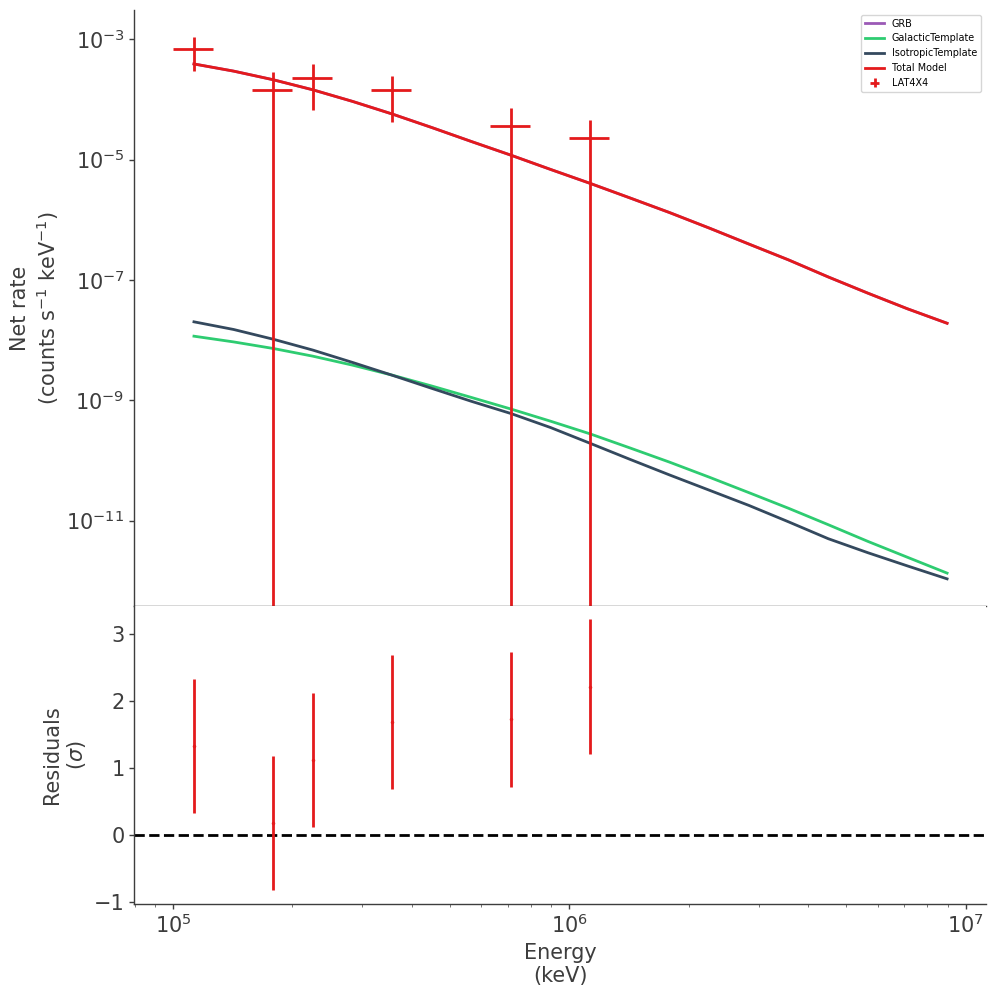

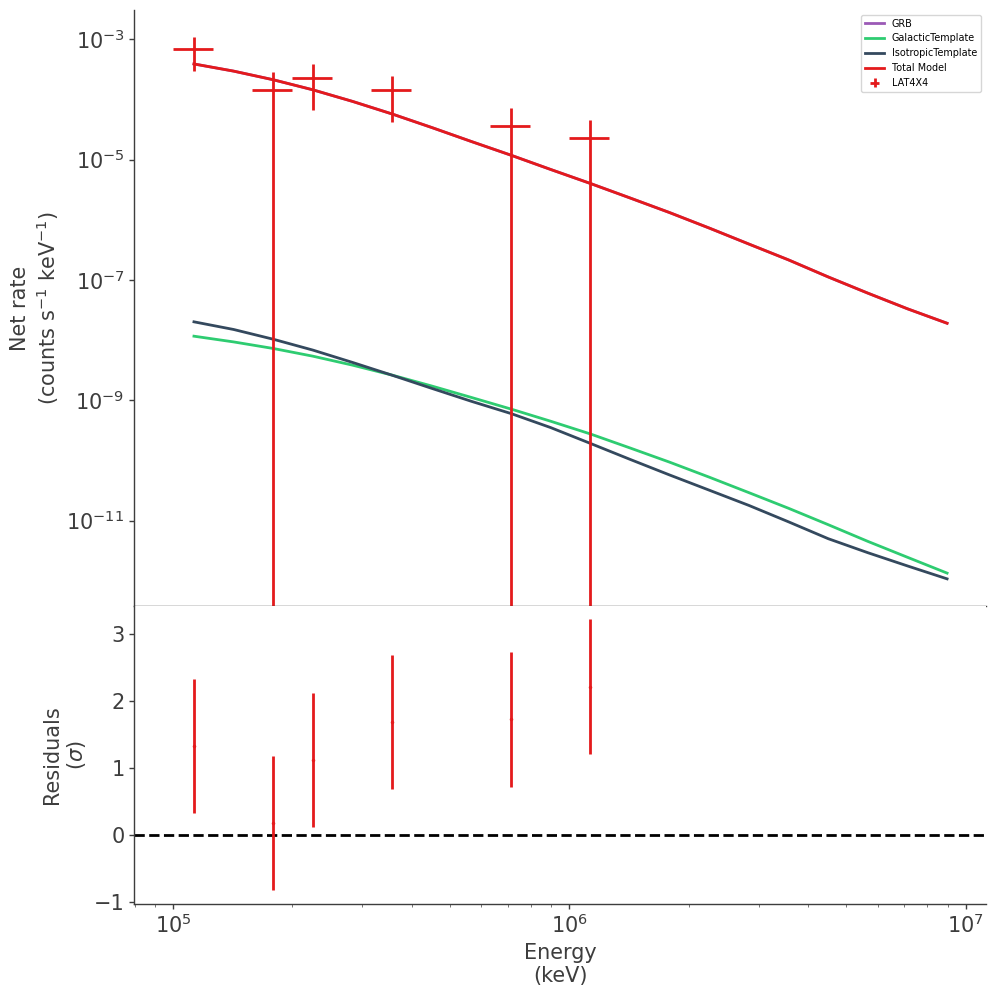

In [16]:
i = 3
T0, T1 = intervals[i], intervals[i + 1]
LAT_name = "LAT_%06.3f-%06.3f" % (T0, T1)
jl = results[LAT_name]
jl.results.display()
display_spectrum_model_counts(jl, step=False, figsize=(10, 10))

We can see the evolution of the spectrum with time (not all the bins are diplayed):


10:35:34 DEBUG     adding child ra                                                                  ]8;id=194147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=948477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=360185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=498000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=680564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=815065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=251967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=929961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=32571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=737198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=617528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=855686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=223116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=861897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=664449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=662987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=808109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=382897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=370085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=982832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=329174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=468688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=596295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=234434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=811570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=741738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=70968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=128363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=683438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=191240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=885122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=244232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=881899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=329214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=34972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=557213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=622454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=259731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=813517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=843196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=593322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=412770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=925738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=891095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=753830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=843688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=424895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=779275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=449470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=307363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=414783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=110556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=507662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=822182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=271782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=133510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=959379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=534279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=531504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=59826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=377536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=363801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=646700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=392144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

10:35:35 DEBUG     adding child Powerlaw_flux                                                       ]8;id=132817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=688753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=70612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=656044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=122340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=388536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=931162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=713651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=598904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=503487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=770733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=453413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=305989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=348114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=74019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=832148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=907770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=719825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=82646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=339482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=580786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=905060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=694522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=438965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=994310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=210648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=890908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=201927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=369812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=421259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=507368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=685745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=444939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=447490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=513770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=751578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=836736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=265844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=591210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=704847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=677438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=297531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=174178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=102450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=152770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=954587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=660263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=992162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=799737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=185134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=106068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=400139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=452924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=124551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=588490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=383530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=684464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=889703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=758900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=993864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=126130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=590226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=394187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=614421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=468280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=191959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=354842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=619901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=843961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=337602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=696988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=846056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=583868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=527948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=392213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=163129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=90753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=119534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=5148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=949261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=558914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=935111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=50525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=513828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=500356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=762830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=535223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=286204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=771637;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=327037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=604615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=735427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=952323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=795049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=325756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=380170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=19500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=755204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=628033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=621634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=142697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=663704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=998019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=980431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=443709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=595829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=270356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=568522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=373411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=938055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=319608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=247790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=99822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=732261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=460218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=510046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=188412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=754067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=431329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=298177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=853419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=844522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=386577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=293963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=657219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=681687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=33687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=392286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=810300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=836542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=981355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=321053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=920054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=888865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=275794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=830714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=193052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=459446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=669816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=384514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=796682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=655855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=752828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=472772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=790488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=474330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=231034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=608913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=887972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=63888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=515321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=411236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=231117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=485542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=648953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=2045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=719172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=240770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=435093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=875497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=68265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=757654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=240365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=575437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=595797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=32232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=747876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=788896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=562740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=350945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=382538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=276865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=922666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=695441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=844612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=733749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=668998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=432031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=40952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=81383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=496254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=937369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=314958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=50053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=920263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=660302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=296192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=399508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=715587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=189694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=881231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=762198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=616022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=193233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=162487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=903863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=154673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=757809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=161351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=451091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=987477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=365442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=465693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=660304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=476597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=966269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=253597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=640167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=260476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=633261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=201874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=529636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=533156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=34588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=172937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=142880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=106684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=658950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=732543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=735518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=786980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=596019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=996984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=170626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=562042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=244028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=758410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=469862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=277802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=588449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=110647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=173505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=9655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=3707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=776083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=504425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=48202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=717322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=427997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=174840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=960994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=205930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=974357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=45075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=898216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=808541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=772906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=715453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=600831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=717610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=256257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=170273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=325663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=361278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=30097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=549140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=321237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=752250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=747969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=266244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=385055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=868773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=510952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=690157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=690636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=355170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=695844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=836089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=145832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=726573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=837396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=299835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=292961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=563801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=974076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=33959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=301942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=373604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=506830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=860538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=724049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=109837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=132796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=543961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=400272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=73408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=371702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=656142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=202729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=773228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=400890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=548328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=919437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=921764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=416503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=758406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=835812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=353503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=890972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=24317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=102191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=657892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=752636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=90983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=396503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=375203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=124239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=268974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=675776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=618642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=747725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=521584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=223342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=276564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=112697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=976251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=369081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=689245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=146893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=701324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=967091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=109905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=360337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=565509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=620996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=81353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=382052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=850724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=616232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=365960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=409427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=825936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=724645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=817471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=210232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=513027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=822397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=180158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=622687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=207722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=380184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=667739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=668659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=301079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=746183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=497827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=323989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=951675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=115435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=158888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=804192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=477693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=703684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=173029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=470929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=662739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=236558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=980585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=862884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=822813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=789510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=566454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=348821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=868219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=241484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=688738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=735588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=264008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=883080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=980976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=751500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=170994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=648058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=288450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=392761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=697126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=44235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=128047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=887875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=268044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=220972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=844152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=366986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=175909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=768319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=729686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=85481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=235013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=578124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=152064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=642119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=106818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=12623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=585516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=956390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=368554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=796286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=176735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=700137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=621406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=10135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=737340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=633112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=425980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=822150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=850074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=322631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=110392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=984536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=583380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=964164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=450424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=850556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=369631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=238241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=107028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=171241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=904515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=639399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=194773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=137675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=241452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=599447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=653999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=128949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=20737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=659211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=766295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=248935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=115194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=152485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=137658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=226412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=732816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=450764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=248942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=772000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=931988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=43884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=564657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=776674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=872060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=294557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=841256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=742039;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=789555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=872721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=341764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=854659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=628090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=450930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=224107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=741814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=584743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=515325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=46894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=958932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=244068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=822552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=214534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=589909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=438934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=22433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=460545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=821916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=841342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=16362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=231756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=36311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=548063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=894172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=149483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=465741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=366433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=128088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=94900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=380221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=94329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=433765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=769790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=107901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=400095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=767633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=798218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=258265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=786735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=873589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=6735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=211639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=778438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=381614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=683218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=747727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=255121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=29769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=653807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=195540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=174341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=470099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=822819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=311651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=828488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=617563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=848466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=61031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=797995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=832530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=293212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=431700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=169689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=702342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

processing MLE analyses:   0%|          | 0/13 [00:00<?, ?it/s]

         DEBUG     adding child ra                                                                  ]8;id=973937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=715136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=393084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=156670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=412880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=361021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=919903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=855552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=876862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=725210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=95643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=200734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=459737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=357828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=140896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=614655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=333915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=78207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=56847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=19214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=342529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

10:35:36 DEBUG     adding child Powerlaw_flux                                                       ]8;id=756864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=784534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=251591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=696295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=572143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=929056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=530187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=165355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=119370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=285375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=928980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=969644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=193336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=952485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=325806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=766132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=925528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=410363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=125249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=927309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=299420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=534571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=903612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=203210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

10:35:46 DEBUG     adding child ra                                                                  ]8;id=474708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=857831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=752011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=378268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=483255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=329384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=186638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=752072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=970642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=362900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=789698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=718037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=441842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=860668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=427999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=17588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=391153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=146404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=946635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=4883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=622692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=554993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=529992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=132167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=476833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=226116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=767783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=775472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=273165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=407046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=839921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=171134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=516336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=399539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=824271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=948801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=534529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=804087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=751172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=178462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=63436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=152601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=120566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

10:35:57 DEBUG     adding child ra                                                                  ]8;id=995937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=997396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=536974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=135737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=405026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=125351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=326067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=400795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=839891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=103618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=832618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=642633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=921223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=514893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=243292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=855979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=853135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=182509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=575900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=660049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=186420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=685489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=441072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=180260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=232535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=379246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=913875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=492568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=813082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=649469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=532157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=517867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=292175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=81948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=886229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=470869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=119296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=999630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=118473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=851631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=684583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=458978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=944357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

10:36:18 DEBUG     adding child ra                                                                  ]8;id=476844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=836622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=578590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=593775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=399679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=861409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=526694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=239357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=969129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=205280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=191372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=662582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=623035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=618792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=291740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=949040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=308454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=569097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=436972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=683534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=592853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=253328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=673173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=882911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=862214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=337292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=261781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=785227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=770356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=145845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=975278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=192908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=710674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=406865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=581437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=498645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=45149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=940533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=98732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=16986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=324374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

10:36:38 DEBUG     adding child ra                                                                  ]8;id=191594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=756324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=586213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=467517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=707437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=726907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=282193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=135594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=496970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=859542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=964108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=518600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=986425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=166934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=950075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

10:36:39 DEBUG     adding child a                                                                   ]8;id=844299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=220348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=618199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=810110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=16150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=422506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=320075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=527356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=58419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=330952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=431437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=408442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=339502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=98663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=608032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=793060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=188166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=308799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=737021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=568519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=237219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=151482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=252636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=346863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=676319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=620306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=643286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=503849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=116293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=318938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=720120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

10:37:00 DEBUG     adding child ra                                                                  ]8;id=232311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=705155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=897517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=967415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=560002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=52412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=80477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=391787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=189951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=953098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=647064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=61452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=931164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=456643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=219895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=721998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=315109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=225417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=238469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=231837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=62276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=782603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=556677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=341894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=240761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=118137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=960388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=329206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=186180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=968845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=281868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=470470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=724645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=370640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=187184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=211880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=633876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=672825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=663146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=900052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=725359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=948706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=741764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=921446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=943029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=717060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=149668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=284370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=184346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=507796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=248768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

10:37:21 DEBUG     adding child ra                                                                  ]8;id=647924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=267658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=328189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=823549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=497545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=395017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=278666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=133162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=756127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=517659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=815690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=446919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=242850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=417162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=496830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=82075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=743361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=106979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=865579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=823580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=934424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=553981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=931830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=660024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=770170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=250847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=249213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=319426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=271751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=617113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=986914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=915165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=397050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=178341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=484728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=292990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=641483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=888149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=423626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=246600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=481419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=9948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=561551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=975269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

10:37:37 DEBUG     adding child ra                                                                  ]8;id=192236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=100048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=442501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=842015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=917486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=350164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=406847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=656153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=724008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=361170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=413071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=101972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=453788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=139610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=70025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=535636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=283018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=913939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=905985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=195558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=946158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=209745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=425434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=381977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=550463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=32990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=233885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=841911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=213025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=193383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=462331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=349886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=641118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=978178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=482901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=500487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=347386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=986751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=176475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=326681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=564773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=466364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=281520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=796526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

10:37:58 DEBUG     adding child ra                                                                  ]8;id=728714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=787413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=608158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=126372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=936451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=972997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=734349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=822170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=178837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=278957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=847468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=584284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=905064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=613755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=65384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=475799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=549191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=414642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=758101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=583330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=100764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=595958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=111655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=873868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=786791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=966192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=195450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=423440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=867960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=908068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=199660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=207010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=805750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=484636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=688004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=565729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=202418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=468119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=593254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=983185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=614794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=735644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=402567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=569736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=734357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

10:38:19 DEBUG     adding child ra                                                                  ]8;id=492833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=309818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=638816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=90318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=875371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=898213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=957496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=85206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=507094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=701598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=273214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=536392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=813264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=342283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=880717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=535453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=245941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=898325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=686477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=362023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=65298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=357073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=191825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=157823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=28483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=792430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=368795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=400509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=513010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=474528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=782259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=833933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=389659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=360660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=446625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=766501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=420116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=884766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=825284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=537863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

10:38:42 DEBUG     adding child ra                                                                  ]8;id=610936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=243078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=456445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=4262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=97265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=916027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=283070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=746858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=191099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=243207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=171460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=950875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=62465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=167932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=991274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=224276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=741396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=61885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=769254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=332380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=265092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=324092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=470484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=654996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=652976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=144635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=41676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=939996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=185214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=980070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=796836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=927654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=252810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=882907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=568086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=782598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=609109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=771006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=446228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=964338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=476401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=650416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=507282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=863460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=799890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=50403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=606204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=346152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

10:39:03 DEBUG     adding child ra                                                                  ]8;id=990378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=970436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=495530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=402014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=564953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=122670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=595822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=512111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=478000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=500063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=67400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=83436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=85766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=515650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=983053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=312044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=545434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=393640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=152680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=243245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=406026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=839977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=61943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=366686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=757295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=372969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=338502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=57235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=583649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=507540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=525321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=224205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=730652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=8649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=72450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=447746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=249860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=864134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=742403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=518401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

10:39:25 DEBUG     adding child ra                                                                  ]8;id=850061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=309817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=70610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=367100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=503008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=158092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=299593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=720506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=454387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=730038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=666047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=399604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=958006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=401617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=432798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=537679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=687507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=108834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=229444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=80357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=7270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=288287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=548168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=633959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=346012;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=727206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=661601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=961170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=941736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=409157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=273783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=300106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=758337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=535378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=109476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=606269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=453213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=133122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=45744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=822844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=578150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=815919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=620394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=397744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=389062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=30634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=695347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=823194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

10:39:46 DEBUG     converting MeV to MeV                                                          ]8;id=272626;file:///Users/runner/work/threeML/threeML/threeML/io/plotting/model_plot.py\model_plot.py]8;;\:]8;id=465764;file:///Users/runner/work/threeML/threeML/threeML/io/plotting/model_plot.py#848\848]8;;\

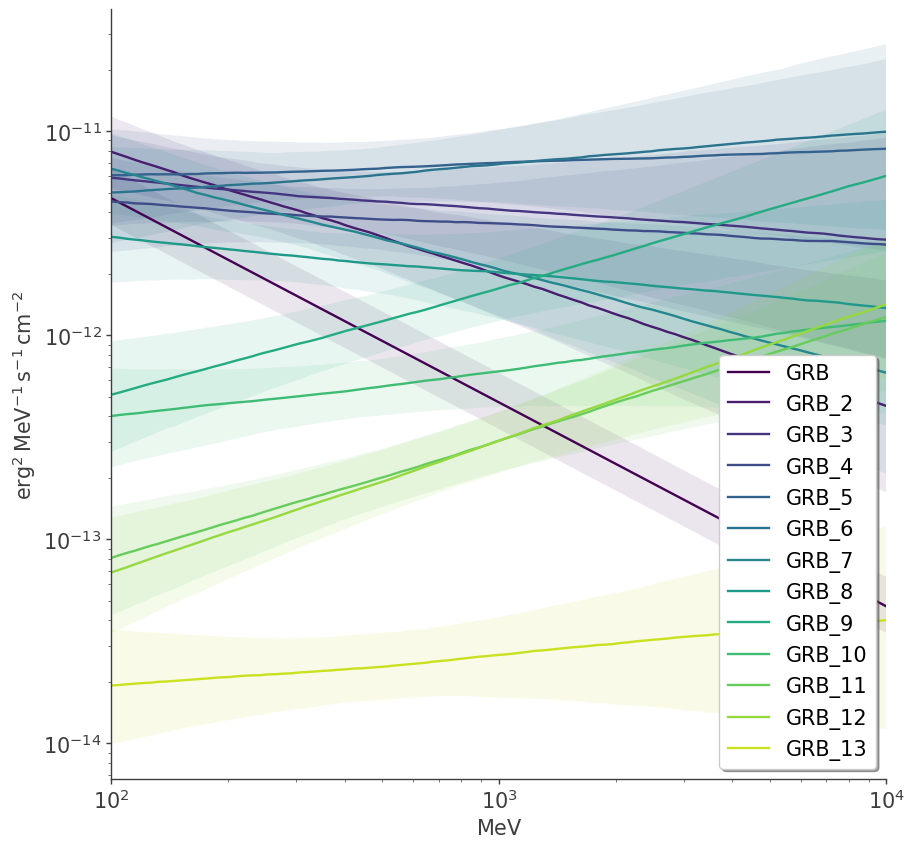

In [17]:
fig = plot_spectra(
    *[results[k].results for k in list(results.keys())[::2]],
    ene_min=100 * u.MeV,
    ene_max=10 * u.GeV,
    flux_unit="erg2/(cm2 s MeV)",
    energy_unit="MeV",
    fit_cmap="viridis",
    contour_cmap="viridis",
    contour_style_kwargs=dict(alpha=0.1)
)
fig.set_size_inches(10, 10)

Finally, we can display flux lightcurves and index evolution with time.


10:39:47 DEBUG     adding child ra                                                                  ]8;id=919618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=320879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=844304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=747152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=282477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=459023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=119596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=344322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=593715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=572170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=50861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=339977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=579861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=581032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=299373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=941418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=575815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=668124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=159752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=692333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=445708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=789887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=592594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=575238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=390595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=431519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=648490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=290310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=860713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=542693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=133691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=325823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=743055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=444017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=307124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=991874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=366072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=633513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=299653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=265666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=347002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=436576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=550760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=965267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=446669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=702681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=995944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=145276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=428228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=814024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=372736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=436929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=803813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=408060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=899036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=153528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=353619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=686349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=468568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=840978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=208889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=922800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=261540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=768241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=610669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=634284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=787596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=135628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=163584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=251370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=725493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=264716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=642917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=803735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=225385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=260374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=984114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=501846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=854998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=45662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=708499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=72437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_GalacticTemplate_Value                                       ]8;id=645001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_GalacticTemplate_Value                                      ]8;id=334116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_IsotropicTemplate_Normalization                              ]8;id=42449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=417201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_IsotropicTemplate_Normalization                             ]8;id=737104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=662698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=279532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=324392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=131226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=207663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=447261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=403692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=198394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=841988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=573974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=698319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=364240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=225785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=263583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=253673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=672668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=276148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=645999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=251318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=457764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=241761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=61807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=716026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=516025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=841914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=820244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=741754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=584327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=541607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=606552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=668963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=156448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=569511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=955602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=894449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=467448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=430627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=871106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=594864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=595360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=320644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=941282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=574736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=229898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=210514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=451400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=908358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=322591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=336126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=87987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=928961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=460551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=332658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=871245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=962941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=425523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=783309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=41635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=172691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=404710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=686150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=527056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=554225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=235917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=85411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=63231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=166679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=541807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=539461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=622405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=936702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=478977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=149980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=557217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=331017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=414999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=34013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=139082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=526906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=338656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=555326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=65656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=273454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=810639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=710578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=808743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=260230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=117203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_GalacticTemplate_Value                                       ]8;id=994163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_GalacticTemplate_Value                                      ]8;id=706589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=354356;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_IsotropicTemplate_Normalization                              ]8;id=783868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=413115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_IsotropicTemplate_Normalization                             ]8;id=189448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=388150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=193821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=109591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=355827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=107338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=856273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=914953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=851427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=565638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=62335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=607103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=422297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=56346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=344907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=388086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=545177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=350966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=188851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=937276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=558113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=569672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=507682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=207735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=436219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=547099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=130410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=564876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=375066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=697412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=945090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=451556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=510627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=246865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=482637;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=978338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=950332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=409011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=336324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=818093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=818427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=611247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=173085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=21252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=653614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=999582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=89835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=558262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=662992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=677199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=256155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=11169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=426050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=822509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=169560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=439868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=30423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=804856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=510924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=617265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=458267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=539789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=193697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=426500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=435728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=526639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=634506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=103328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=508897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=257148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=895821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=768987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=313297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=691959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=549341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=236296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=759657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=744437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=388740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=371411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=837348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=561975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=433526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=62616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=321279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=447078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=21336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=377796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=527015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=774312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=243776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=294122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=44396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=242062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=58738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=808768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=602713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=575312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=964506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=913673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=630025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=781618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=842036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=188493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=804532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=663738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=252858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=220459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=213780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=450145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=3657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=771459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=977779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=507038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=963355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=217132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

10:39:48 DEBUG     adding child main                                                                ]8;id=420792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=261207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=412218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=925114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=189889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=225418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=296698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=752180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=533017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=854740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=701397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=192648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=732594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=795550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=989296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=451057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=246865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=139638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=776424;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=562077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=657101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=913517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=207429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=956292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=459070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=731277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=57866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=708069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=392282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=503809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=818703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=50140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=135103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=46828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=684252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=179643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=366350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=382464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=893937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=299590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=741527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=568658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=593173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=316578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=184478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=979275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=271653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=557473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=24408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=196249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=291672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=350538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=412631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=607377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=367739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=677803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=379506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=550319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_GalacticTemplate_Value                                       ]8;id=424862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=415891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_GalacticTemplate_Value                                      ]8;id=403219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=963011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_IsotropicTemplate_Normalization                              ]8;id=956731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=668458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_IsotropicTemplate_Normalization                             ]8;id=612720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=55049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=594371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=566020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=664444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=558714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=437041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=791764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=578001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=707021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=522254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=810714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=369701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=231273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=35786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=260019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=863609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=686900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=695734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=739143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=381527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=476453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=251050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=725404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=198146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=411267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=821853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=439883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=494459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=913685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=931147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=311868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=797107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=588166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=965434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=188262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=477999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=50557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=799283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=621380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=137813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=454260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=440114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=665848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=717216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=809181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=451525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=545759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=269031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=653911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=86376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=257214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=215080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=983384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=364363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=18121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=721520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=597707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=92524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=163651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=557038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=922647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=14042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=715400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=587527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=290446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=588063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=820805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=781399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=117175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=21932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=820038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=106280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=631190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=566419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=746569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=724024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=207123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=219827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=532250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=285067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=847128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=393390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_GalacticTemplate_Value                                       ]8;id=219014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=300493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_GalacticTemplate_Value                                      ]8;id=110709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=669621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_IsotropicTemplate_Normalization                              ]8;id=959445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_IsotropicTemplate_Normalization                             ]8;id=833278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=886285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=732124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=336202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=446821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=321457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=840219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=909293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=646419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=399804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=289651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=787838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=343105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=49459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=66283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=742224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=884002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=995906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=192221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=133457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=707973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=45908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=917795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=203041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=965388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=296782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=508805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=702236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=271051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=903480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=809532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=928599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=232694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=691548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=169695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=408248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=347465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=730602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=70394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=41676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=482739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=51719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=395636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=633937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=172040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=832166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=255151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=633920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=399592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=737457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=154883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=638529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=945017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=915651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=618154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=529981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=152088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=203470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=408126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=640874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=641779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=177233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=315013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=397325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=26156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=413216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=930928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=700895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=645873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=626818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=666153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=387549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=409826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=21722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=62998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=872330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=851409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=452513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=802835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=783117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=604081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=164835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=379956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=104502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=437925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=407398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=382932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=708270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=426672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=194383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=886705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=526732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=440289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=338920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=383509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=424614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=94080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=104954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=688132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=825067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=84782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=371101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=727591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=845519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=38443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=598081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=326636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=619917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=56976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=264225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=366043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=44336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=19211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=913483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=341702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=66998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=455673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=167384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=91905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=223146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=698426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=145783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=239505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=250186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=288865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=767458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=888517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=114543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=698481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=48427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=305581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=605083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=90011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=408520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=328931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=135120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=240066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=105769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=924499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=860104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=301415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=757150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=519509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=658909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=851242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=924626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=786733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=4941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=224375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=577338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=508172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=479419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=172477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=406608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=36779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=195301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=756550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=420060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=546657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=262292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=449800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=298760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=339879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=289509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=798321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=387035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_GalacticTemplate_Value                                       ]8;id=914172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=200853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_GalacticTemplate_Value                                      ]8;id=14183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_IsotropicTemplate_Normalization                              ]8;id=324981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_IsotropicTemplate_Normalization                             ]8;id=987745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=204303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=449584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=762550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=103461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=308190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=907149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=339265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=232140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=723735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=403633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=175198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=406609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=324095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=742953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=301485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=588609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=860457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=696641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=380817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=224411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=928945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=255183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=670179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=751007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=555563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=74286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=258642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=347802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=675912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=764370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=319559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=654693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=294504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=687967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=487059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=31529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=207765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=463634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=174986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=400134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=894322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=545004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=613028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=532347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=39184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=242388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=220201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=713198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=327007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=501795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=770348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=308075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=604958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=581338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=876314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=496687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=971920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=530979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=530684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=421918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=212323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=94309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=759683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=373527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=983095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=720955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=434523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=570929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=939265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=368155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=209617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=755442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=865368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=336826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=320456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=533852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=955179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=412006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=539210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=127411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=569241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=865588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_GalacticTemplate_Value                                      ]8;id=917050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=859647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_GalacticTemplate_Value                                     ]8;id=733724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=286985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_IsotropicTemplate_Normalization                             ]8;id=524918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_IsotropicTemplate_Normalization                            ]8;id=773827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=546681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=590204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=617592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=867358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=916868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=186799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=804902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=617962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=539147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=477781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=216860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=70930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=119127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=622600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=845948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=872333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=411843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=620566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=653452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=88467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=334559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=865256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=776296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=735334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=5738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=778371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=595269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=125619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=520868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=207192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=146499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=928838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=784777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=443856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=462076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=289726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=495459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=803141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=647862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=804718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=492103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=608913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=98809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=604075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=270148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=211567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=488164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=237587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=697734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=734273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=316480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=964314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=841693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=616273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=181630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=964279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=267875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=809761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=501553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=238895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=939361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=812809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=52239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=988238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=568506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=497167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=340396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=340416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=517387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=928537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=63566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=535649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=439069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=10642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=238995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=946555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=160781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=325824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=557059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_GalacticTemplate_Value                                     ]8;id=685834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_GalacticTemplate_Value                                    ]8;id=538064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=133456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_IsotropicTemplate_Normalization                            ]8;id=55211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=847612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_IsotropicTemplate_Normalization                           ]8;id=932133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=915729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=318406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=703613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=428453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=717283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=226044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=82231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=128013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=664530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=717440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=734217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=339828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=740261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=327510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

10:39:49 DEBUG     adding child a                                                                   ]8;id=128332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=992469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=67493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=419495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=230983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=865937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=818197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=999005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=578359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=611629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=800454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=181121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=529419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=559401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=967625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=838639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=335291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=11582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=606774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=869452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=989851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=283532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=963949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=217352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=429598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=476446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=836242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=640103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=431852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=437864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=626981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=745498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=718663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=891052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=34787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=24344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=366389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=300930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=921755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=296088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=607439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=661758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=609279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=599693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=909772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=854915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=517368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=178521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=248295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=962029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=139196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=466226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=894117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=936049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=40411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=899813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=591768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=369129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=678657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=298465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=595818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=952397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=292282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=911772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=693505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=48400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=858535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=895736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=51056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=273387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_GalacticTemplate_Value                                     ]8;id=456898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_GalacticTemplate_Value                                    ]8;id=819883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=821518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_IsotropicTemplate_Normalization                            ]8;id=579981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_IsotropicTemplate_Normalization                           ]8;id=693629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=120208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=528379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=66876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=668890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=494572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=641166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=628888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=326140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=920821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=415639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=497901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=64583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=450171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=939057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=448586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=263692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=328376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=343702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=706025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=488441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=985235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=153610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=724412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=807008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=9824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=161329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=483889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=683051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=310442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=837624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=823082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=599162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=530073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=152340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=401984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=469389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=423511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=899049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=742915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=337318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=853595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=819963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=126199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=359831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=253718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=101690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=543862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=467588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=445976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=896785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=67075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=626339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=1963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=244714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=220409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=552821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=142136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=445708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=284276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=883908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=712239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=582071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=608445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=277500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=454829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=580916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=275046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=459804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=284393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259012;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=309743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=314822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=570902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=620973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=543719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=213712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=57278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=782712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=775934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_GalacticTemplate_Value                                     ]8;id=178841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=717474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_GalacticTemplate_Value                                    ]8;id=456070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=57624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_IsotropicTemplate_Normalization                            ]8;id=712197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=500229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_IsotropicTemplate_Normalization                           ]8;id=743428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=228491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=630194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=503989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=628591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=322082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=801676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=346914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=315170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=762072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=115400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=781818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=475857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=776144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=456973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=518934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=909173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=286142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=998936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=719214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=560838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=226013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=832444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=199626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=427153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=891025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=534863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=23866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=872433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=968292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=28988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=934293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=140479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=787137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=844907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=908711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=908092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=804593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=336355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=144298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=6337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=912636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=117379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=66546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=683054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=791633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=18521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=123018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=489465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=243942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=594182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=681172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=397611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=931832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=177608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=716229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=114560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=576649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=919331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=296816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=808818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=210403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=348027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=661438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=368726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=715000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=441508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=910161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=136553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=57565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=157496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=39977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=951864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=731817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=652810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=539129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=892540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=869751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=282176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=579002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=981513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=858145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_GalacticTemplate_Value                                     ]8;id=401076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=808860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_GalacticTemplate_Value                                    ]8;id=682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=3558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_IsotropicTemplate_Normalization                            ]8;id=449588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=181212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_IsotropicTemplate_Normalization                           ]8;id=347918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=285962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=221970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=174978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=675368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=57390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=683972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=503329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=705685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=658148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=299078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=21835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=750541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=997462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=297392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=66798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=680193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=447130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=534927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=189134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=999621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=399095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=156387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=659177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=680979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=400055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=999153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=228571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=397085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=48402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=258098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=774473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=719623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=640717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=334359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=699841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=391875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=801630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=713559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=911616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=751788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=158562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=520963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=951308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=192936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=242257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=459092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

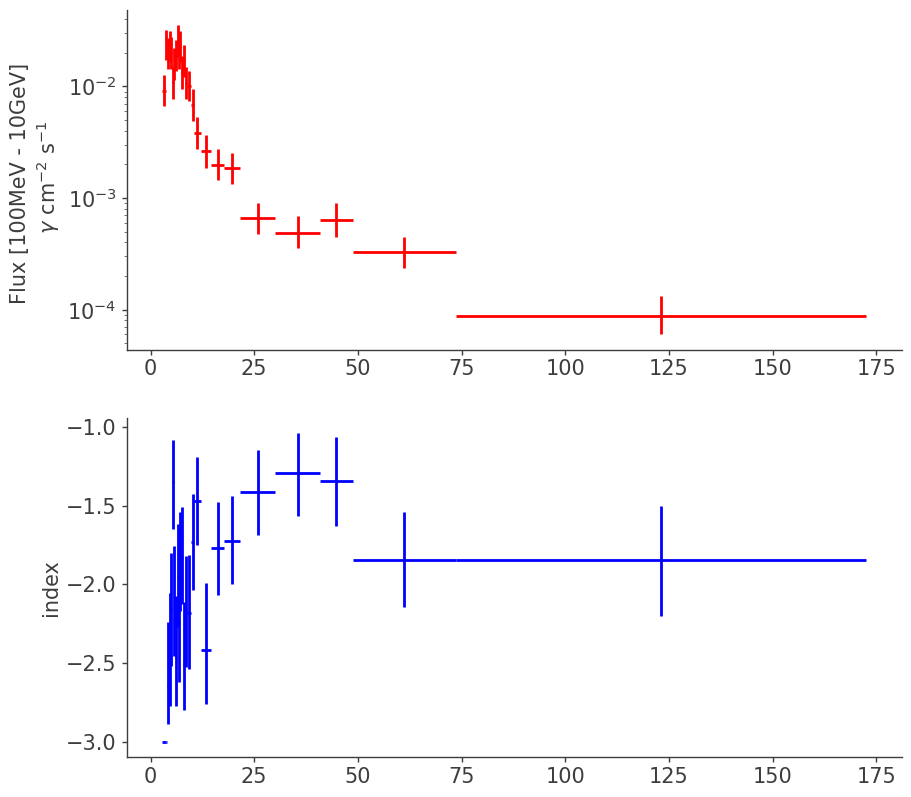

In [18]:
variates = ["F", "index"]
y = {}
for n in variates:
    y[n] = []
    y[n + "_p"] = []
    y[n + "_n"] = []
x = []
dx = []


for T0, T1 in zip(intervals[:-1], intervals[1:]):
    LAT_name = "LAT_%06.3f-%06.3f" % (T0, T1)
    x.append((T1 + T0) / 2)
    dx.append((T1 - T0) / 2)
    jl = results[LAT_name]
    res = jl.results
    mod = res.optimized_model
    ps = mod.point_sources

    for n in variates:
        my_variate = res.get_variates("GRB.spectrum.main.Powerlaw_flux.%s" % n)
        y[n].append(my_variate.median)
        y[n + "_p"].append(my_variate.equal_tail_interval()[1] - my_variate.median)
        y[n + "_n"].append(my_variate.median - my_variate.equal_tail_interval()[0])
        pass
    pass

fig = plt.figure(figsize=(10, 15))
colors = ["r", "b"]
ylabels = ["Flux [100MeV - 10GeV] \n $\gamma$ cm$^{-2}$ s$^{-1}$", "index"]
for i, n in enumerate(variates):
    plt.subplot(len(variates) + 1, 1, i + 1)
    plt.errorbar(x, y[n], xerr=dx, yerr=(y[n + "_n"], y[n + "_p"]), ls="", c=colors[i])
    if i == 0:
        plt.yscale("log")
    # plt.xscale('log')
    plt.ylabel(ylabels[i])
    pass